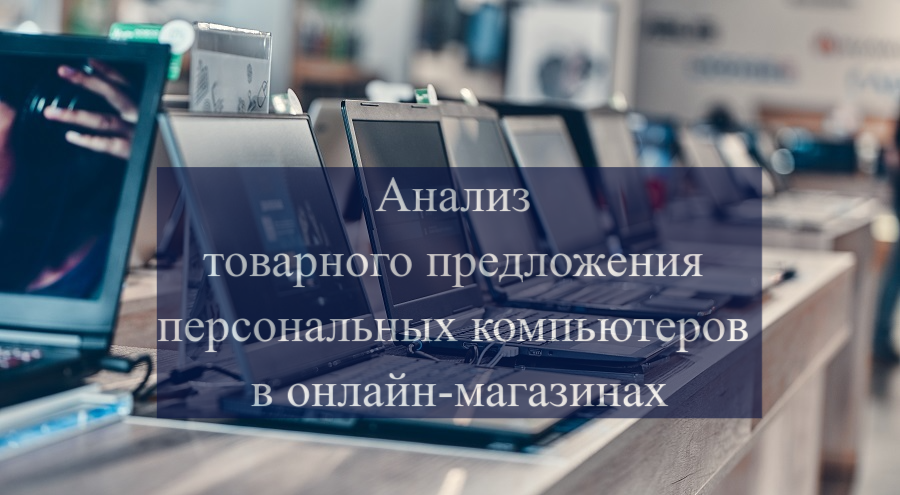

# ▶ Кейс

---



К нам обратился клиент, который занимается сборкой и продажей персональных компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т. п., за последние несколько лет, а также с целью привлечения большего числа клиентов при одновременном снижении затрат на содержание собственного магазина, доставку и рекламу товаров он планирует выйти на онлайн-рынок. В связи с этим клиент хотел бы узнать, от чего зависит цена, а также популярность персональных компьютеров, выкладываемых на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные по техническим характеристикам компьютеры и продавать их по конкурентной цене.
Специалистом по сбору данных был выгружен файл в формате csv с одного из популярных онлайн-магазинов, содержащий информацию о товарах категории «Компьютеры и моноблоки».<br>
Проанализируйте полученные данные и представьте аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения своих бизнес-задач.


# ▶ Понимание бизнеса (business understanding)

---



## Бизнес-цель
Клиент планирует выйти на онлайн-рынок и привлечь новых покупателей. Бизнес-целью может являться: <br>
**Увеличение на 10 % общего объема продаж компьютеров с помощью сделок на онлайн-площадках Wildberries и Ozon и снижение затрат на содержание собственного магазина, доставку и рекламу товаров на 5%  в течение следующих 6 месяцев**. <br>
Для определения более реальной и конкретной цели по снижению расходов, необходимо узнать у заказчика:
*   сколько составляют расходы на содержание собственного магазина. Какова удельная доля расходов на единицу проданной  продукции?
*   Какие мероприятия по сокращению расходов можно провести?
*   Какие комиссионные расходы по заключению договоров с онлайн-площадками возникают?


## Цель анализа данных
**Определить характеристики конкурентноспособной продукции** (компьютерной техники), которая продается через онлайн-магазины.
*	Компьютеры с какими характеристиками являются самыми популярными (продаваемыми) на онлайн-площадках?
*	От каких параметров компьютерной техники зависит её цена?

Объект исследования: Продажи компьютеров в онлайн-магазинах <br>
Предмет исследования: Предметом исследования являются зависимость объема продаж и цены продаж от характеристик продаваемых компьютеров


## Источники данных
Данные (структурированные) для анализа продаж в  онлайн-магазинах были предоставлены представителем Клиента в формате csv. Сбор данных осуществлен из открытых источников.


# ▶ Понимание данных (data understanding)


---



In [182]:
%matplotlib inline
# импортируем библиотеки
import warnings
import pandas as pd
import numpy as np
import json, re
from math import floor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import random
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [183]:
warnings.filterwarnings('ignore') #'ignore' - никогда не печатать соответствующие предупреждения
pd.set_option('display.max_columns', None) # будем отображать максимальное количество колонок

In [184]:
 # загрузим датасет
!gdown --id 1ELtXzHAS3IG3lqbXSanNZuq-hc0PHFGB
data = pd.read_csv('final_task.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ELtXzHAS3IG3lqbXSanNZuq-hc0PHFGB
To: /content/final_task.csv
100% 3.97M/3.97M [00:00<00:00, 79.6MB/s]


## Обзор файла и описание проблем

In [185]:
data.head(2)

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."


In [186]:
data.shape

(4500, 16)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

In [188]:
# Проверим на дубликаты. 490 полных дубликатов. 10,9% от всей выборки
filter_duplicated = data.duplicated()
filter_duplicated.sum(), str(round(filter_duplicated.mean()*100,1))+'% от общей выборки'

(490, '10.9% от общей выборки')

In [189]:
# Определим те позиции, которые не имеют отношения к нашей задаче
def is_not_title_correct(title):
  return (
          ('POS-компьютер' in title) or
          ('Безвентиляторный' in title) or
          ('Мини ' in title) or
          ('Кабель' in title) or
          ('моноблок' in title) or
          ('I3-6100T 2 Core' in title) or
          ('Микрокомпьютер' in title) or
          ('ШТРИХ-POS-ATOM' in title) or
          ('компьютер' not in title.lower()) and
          ('ПК' not in title.lower()) and
          ('Мощный' not in title) and
          ('Chip computers' not in title) and
          ('Системный блок' not in title) and
          ('Десктоп' not in title) and
          ('Basic' not in title) and
          ('PC IRU' not in title) and
          ('ПК IRU' not in title) and
          ('Ryzen 5' not in title) and
          ('Xeon/' not in title) and
          ('Xeоn/' not in title) and
          ('Игровой' not in title) and
          ('intel' not in title.lower()) and
          ('Intеl 4 ядра' not in title) and
          ('i5' not in title.lower()) and
          ('i3' not in title) and
          ('i7' not in title)
         )

# создадим фильтр не нужных строк
filter_not_usefull = data['title'].apply(is_not_title_correct)

# эти позиции входить не должны, в том числе и неттопы, мини пк, моноблоки, оборудование для майнинга
# for title in data[filter_not_usefull]['title']:
#   print(title)
# выведем список того что попадет в выборку
# for title in data[~filter_not_usefull]['title']:
#   print(title)

In [190]:
# 467 позиций нашего датасета не имеет отношения к нашей задаче
filter_not_usefull.value_counts()

False    4033
True      467
Name: title, dtype: int64

In [191]:
# выясним из каких параметров состоят вложенные данные
print(data[:1]['Процессор'].iloc[0])
print(data[:1]['Оперативная память'].iloc[0])
print(data[:1]['Жесткий диск'].iloc[0])
print(data[:1]['Габариты товара'].iloc[0])
print(data[:1]['Габариты товара (с упаковкой)'].iloc[0])

{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}
{'Тип оперативной памяти': 'DDR 3', 'Объем оперативной памяти (Гб)': '4 ГБ'}
{'Объем накопителя HDD': None, 'Объем накопителя SSD': None}
{'Ширина предмета': '28.5 см', 'Глубина предмета': '40 см', 'Высота предмета': '9.6 см', 'Вес без упаковки (кг)': '3.5 кг'}
{'Длина упаковки': '43.5 см', 'Ширина упаковки': '12.5 см', 'Высота упаковки': '34 см', 'Вес с упаковкой (кг)': '5 кг'}


In [192]:
# Количество строк с мониторами - завышенная стоимость наблюдения
print(len(data[data['title'].str.contains('Монитор')].index), 'позиций с мониторами')


235 позиций с мониторами


### Описание датасета
В датасете представлены данные о продажах категории «Компьютеры и моноблоки» в онлайн-магизинах <br>
Датасет содержит 4500 записей и 16 реквизитов

* product_id - индетификатор товара
* title - наименование товара
* price - цена товара
* sales - количество совершенных покупок
* feedbacks - количество отзывов
* seller - продавец
* seller_rating - рейтинг товара у продавца
* Процессор
* Оперативная память
* Жесткий диск
* Видеопроцессор
* Операционная система
* Гарантийный срок
* Страна производства
* Габариты товара
* Габариты товара (с упаковкой)

###Проблемы датасета
####  ✔ ***Записи***
1. **Дубликаты** В датасете 490 полных дубликатов - они подлежат удалению.
2. **Данные, не относящиеся к нашей задаче.** Датасет содержит не только уже собранные, cкомплектованные компьютеры, но и комплектующие, игровые контроллеры, оборудование для майнинга, рюкзаки, сумки и даже криптокошельки. 467 позиций нашего датасета не имеет отношения к нашей задаче. Необходимо отфильтровать датасет только по нужным для анализа строками - компьютеры и системные блоки.
3. **Искажение цены позиции**. В датасете присутствуют позиции, которые укомплектованы мониторами - 235 строк. Предлагается удалять их при анализе цены компьютера.

####  ✔ ***Признаки***
1. **Отсутствующие значения**. <br> <br>
<table>
<caption><big><big><strong>Обнаруженные пропуски в данных до распаковки вложенных структур данных</big></big></caption>
<thead>
<th>Признак</th><th>Количество значений</th><th>Пропущено значений</th><th>Решение проблемы</th>
</thead>
<tbody>
<tr align=center><td>price</td><td>4499</td><td>1</td><td align=left>для заполнения пропущенного значения цены - так как  это всего одно значение - возьмем с сайта продавца.</td></tr>
<tr align=center><td>sales</td><td>1164</td><td>3336</td><td align=left>Оставим пропуски (продаж по ним может и не быть)</td></tr>
<tr align=center><td>seller</td><td>4391</td><td>109</td><td align=left>оставим как есть - признак удалим как ненужный</td></tr>
<tr align=center><td>seller_rating</td><td>4389</td><td>111</td><td align=left>Оставим пропуски</td></tr>
<tr align=center><td>Гарантийный срок (garant)</td><td>2648</td><td>1852</td><td align=left>Оставим пропуски</td></tr>
<tr align=center><td>Страна производства</td><td>2611</td><td>1889</td><td align=left>оставим как есть, признак не будем брать для анализа</td></tr>
</tbody>
</table>
<br>
<table>
<caption><big><big><strong>Обнаруженные пропуски в данных после распаковки вложенных структур данных</big></big></caption>
<thead>
<th>Признак</th><th>Количество значений</th><th>Пропущено значений</th><th>Решение проблемы</th>
</thead>
<tbody>
<tr align=center><td>proc_cores (количество ядер процессора)</td><td>3779</td><td>721</td><td align=left>заполним модой</td></tr>
<tr align=center><td>ram (Объем оперативной памяти)</td><td>3787</td><td>713</td><td align=left>заполним модой</td></tr>
<tr align=center><td>hdd_capacity (Обьем hdd диска)</td><td>1273</td><td>3227</td><td align=left>Оставим пропуски</td></tr>
<tr align=center><td>ssd_capacity (Обьем ssd диска)</td><td>3737</td><td>763</td><td align=left>Оставим пропуски</td></tr>
<tr align=center><td>Габариты товара - ширина (dimensions_width)</td><td>1864</td><td>2636</td><td align=left>Количество пропусков слишком большое (58,6%). Исключим признак из анализа</td></tr>
<tr align=center><td>Габариты товара - ширина (dimensions_depth)</td><td>1856</td><td>2644</td><td align=left>Количество пропусков слишком большое (58,7%). Исключим признак из анализа</td></tr>
<tr align=center><td>Габариты товара - высота (dimensions_height)</td><td>1885</td><td>2615</td><td align=left>Количество пропусков слишком большое (58,1%). Исключим признак из анализа</td></tr>
<tr align=center><td>Габариты товара - вес (weight)</td><td>3289</td><td>1211</td><td align=left>Количество пропусков большое (26,9%). Оставим как есть</td></tr>
</tbody>
</table>

2. **Недопустимые значения или форматы** <br><br>
<table>
<thead>
<th>Признак</th><th>Формат данных</th><th>Требуемый формат</th><th>Примечание</th>
</thead>
<tbody>
<tr align=left><td>price</td><td>Строковый</td><td>float</td><td></td></tr>
<tr align=left><td>sales</td><td>Строковый</td><td>int</td><td></td></tr>
<tr align=left><td>feedbacks</td><td>Строковый</td><td>int</td><td></td></tr>
<tr align=left><td>Гарантийный срок</td><td>Строковый</td><td>int</td><td>Перекодируем в ранговый признак (в недели)</td></tr>
<tr align=left><td>ram_type</td><td>91 значение "не заполнено"</td><td></td><td>Заполним модой</td></tr>
</tbody>
</table>
<br>

3. **Вложенные структуры данных**
<table>
<thead><tr>
<th>Признак</th><th>Тип значения</th><th>Решение проблемы</th>
</tr>
<tr>
</tr></thead>
<tbody>
<tr align=center><td>Процессор</td><td>json</td><td>распаковать в отдельные столбцы, конвертировать числовые значения в числовые типы </td></tr>
<tr align=center><td>Оперативная память</td><td>json</td><td>распаковать в отдельные столбцы, конвертировать числовые значения в числовые типы</td></tr>
<tr align=center><td>Жесткий диск</td><td>json</td><td>распаковать в отдельные столбцы, конвертировать числовые значения в числовые типы</td></tr>
<tr align=center><td>Габариты товара</td><td>json</td><td>распаковать в отдельные столбцы, конвертировать числовые значения в числовые типы</td></tr>
</tbody>
</table>
<br>
4. **Признаки не несущие информационной ценности - подлежат удалению**
  * product_id
  * title
  * seller
  * Габариты товара
  * Габариты товара (с упаковкой)
  * Страна производства

# ▶ Подготовка данных (data preparation)


---



## Исключение данных, не относящихся к нашей задаче

In [193]:
# создадим датасет, очищенный от ненужных данных
df = data[~filter_not_usefull]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4033 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4033 non-null   int64  
 1   title                          4033 non-null   object 
 2   price                          4032 non-null   object 
 3   sales                          1014 non-null   object 
 4   feedbacks                      4033 non-null   object 
 5   seller                         3931 non-null   object 
 6   seller_rating                  3929 non-null   float64
 7   Процессор                      4033 non-null   object 
 8   Оперативная память             4033 non-null   object 
 9   Жесткий диск                   4033 non-null   object 
 10  Видеопроцессор                 4033 non-null   object 
 11  Операционная система           4033 non-null   object 
 12  Гарантийный срок               2438 non-null   o

In [194]:
shape_current = df.shape
shape_current, data.shape[0] - shape_current[0]

((4033, 16), 467)

## Обработка дубликатов

In [195]:
# Удалим полные дубликаты.
# После удаления данных, не относящихся к нашей задаче, осталось 441 дубликат. Удалим их
df = df.drop_duplicates()
print(df.shape, shape_current[0]-df.shape[0])
shape_current = df.shape

(3593, 16) 440


## Распаковка данных (вложенные структуры данных). Конвертирование в нужные форматы

In [196]:
# функция извлечения цифр из строки
def clear_number(number):
  if pd.isnull(number):
    return pd.NA
  else:
    match = re.search('\d*\.\d+|\d+',  number)
    if match:
      return match.group(0)
    else:
      return pd.NA

In [197]:
# Распаковка Процессора
df['proc_type'] = df['Процессор'].apply(lambda x: eval(x)['Процессор_тип'])
df['proc_cores'] = df['Процессор'].apply(lambda x: eval(x)['Количество ядер процессора']).apply(clear_number)
df['proc_cores']  = df['proc_cores'].fillna(df['proc_cores'].mode()[0] ).astype('int64')
# Распаковка Оперативной памяти
df['ram_type'] = df['Оперативная память'].apply(lambda x: eval(x)['Тип оперативной памяти'])
df['ram'] = df['Оперативная память'].apply(lambda x: eval(x)['Объем оперативной памяти (Гб)']).apply(clear_number)
df['ram'] = df['ram'].fillna(df['ram'].mode()[0]).astype('int64')

In [198]:
# Функция распаковки объема жестких дисков
def clear_hd(hd, type_hd):
  hd_dict = dict()
  hd_dict[type_hd+'_0'] = None
  hd_dict[type_hd+'_1'] = None

  if hd:
    hd = hd.replace('+',';')

    hd_split = hd.lower().split(';')

    for i in hd_split:
      match = re.search('\d+',  i.lstrip())

      if match:
        n = int(match.group(0))
        if (i.lower().find('тб') != -1) or (i.lower().find('tb') != -1):
          n *= 1000
        hd_dict[type_hd+'_'+str(hd_split.index(i))] = str(n)

  s = '{'+', '.join(f'\'{k}\': {v}' for k, v in hd_dict.items())+'}'
  return s

In [199]:
# Распаковка Жесткого диска
df['hdd_capacity'] = df['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя HDD'])
df['ssd_capacity'] = df['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя SSD'])
# Распаковка объемов, которые указаны через запятую
df['hdd_capacity'] = df['hdd_capacity'].apply(lambda x: clear_hd(x, 'hdd_capacity'))
df['ssd_capacity'] = df['ssd_capacity'].apply(lambda x: clear_hd(x, 'ssd_capacity'))
df['hdd_capacity_0'] = df['hdd_capacity'].apply(lambda x: eval(x)['hdd_capacity_0']).astype("Int64")
df['hdd_capacity_1'] = df['hdd_capacity'].apply(lambda x: eval(x)['hdd_capacity_1']).astype("Int64")
df['ssd_capacity_0'] = df['ssd_capacity'].apply(lambda x: eval(x)['ssd_capacity_0']).astype("Int64")
df['ssd_capacity_1'] = df['ssd_capacity'].apply(lambda x: eval(x)['ssd_capacity_1']).astype("Int64")

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 4499
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3593 non-null   int64  
 1   title                          3593 non-null   object 
 2   price                          3592 non-null   object 
 3   sales                          900 non-null    object 
 4   feedbacks                      3593 non-null   object 
 5   seller                         3504 non-null   object 
 6   seller_rating                  3503 non-null   float64
 7   Процессор                      3593 non-null   object 
 8   Оперативная память             3593 non-null   object 
 9   Жесткий диск                   3593 non-null   object 
 10  Видеопроцессор                 3593 non-null   object 
 11  Операционная система           3593 non-null   object 
 12  Гарантийный срок               2173 non-null   o

In [201]:
# удалим позиции с двойными дисками HHD и SSD, т.к.эти позииции тоже дают искажение цены
# их 11 - одна позиция одновременно имеет и два hdd и два ssd
filter = df['hdd_capacity_1'].notna() | df['ssd_capacity_1'].notna()
df = df[~filter]
print(df.shape, shape_current[0]-df.shape[0])
shape_current = df.shape

(3582, 26) 11


## Проверка типов остальных данных, приведение данных в необходимый тип

In [202]:
# приведем цену к числовому типу
df['price'] = df['price'].apply(clear_number)
df['price'] = pd.to_numeric(df['price'], downcast='float', errors='coerce').astype('float64')
df['price'].sample(2)

1913    52252.0
531     27473.0
Name: price, dtype: float64

In [203]:
# приведем количество покупок к числовому типу
df['sales'] = df['sales'].apply(clear_number)
df['sales'] = df['sales'].astype('Int64')
df['sales'].sample(2)

1414    <NA>
4188    <NA>
Name: sales, dtype: Int64

In [204]:
# приведем количество отзывов к числовому типу
df['feedbacks'] = df['feedbacks'].apply(clear_number)
df['feedbacks'] = df['feedbacks'].astype('Int64')
df['feedbacks'].sample(2)

1396    1
1023    0
Name: feedbacks, dtype: Int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 4499
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3582 non-null   int64  
 1   title                          3582 non-null   object 
 2   price                          3581 non-null   float64
 3   sales                          899 non-null    Int64  
 4   feedbacks                      3582 non-null   Int64  
 5   seller                         3493 non-null   object 
 6   seller_rating                  3492 non-null   float64
 7   Процессор                      3582 non-null   object 
 8   Оперативная память             3582 non-null   object 
 9   Жесткий диск                   3582 non-null   object 
 10  Видеопроцессор                 3582 non-null   object 
 11  Операционная система           3582 non-null   object 
 12  Гарантийный срок               2164 non-null   o

## Обзор и очистка, проверка и обработка пустых значений


price

In [206]:
# price. Пропущено 1 значение. Найдем
df[pd.isna(df['price'])]

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой),proc_type,proc_cores,ram_type,ram,hdd_capacity,ssd_capacity,hdd_capacity_0,hdd_capacity_1,ssd_capacity_0,ssd_capacity_1
1916,141714708,Системный блок Azerty AZ-0102,NaN,10,4,Техноцентр,4.6,"{'Процессор_тип': 'Intel Xeon', 'Количество яд...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Radeon RX580 8Gb,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '34 см', 'Ширина упаковки':...",Intel Xeon,6,DDR 3,8,"{'hdd_capacity_0': None, 'hdd_capacity_1': None}","{'ssd_capacity_0': 500, 'ssd_capacity_1': None}",<NA>,<NA>,500,<NA>


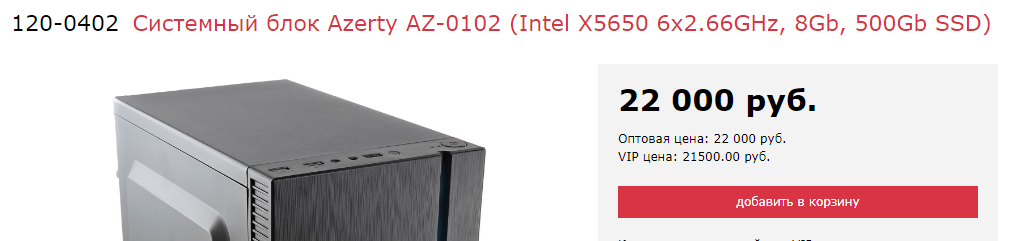

In [207]:
# возьмем сайта продавца
df.at[1916, 'price'] = 22000

In [208]:
df['price'].describe()

count      3582.000000
mean      66148.070631
std       32716.887203
min         254.000000
25%       38976.500000
50%       65630.000000
75%       83404.000000
max      235900.000000
Name: price, dtype: float64

минимальная цена 254 не являеся реальной. проверим сколько может быть таких значений и заполним нулями и будем удалять их при анализе цены

In [209]:
filter_price_clear = (df['price']>10000) & (~df['title'].str.contains('Монитор'))
sum(filter_price_clear)

3360

In [210]:
# df[filter_price_clear]

feedbacks

In [211]:
filter = df['feedbacks'] == 0
df.loc[filter, 'feedbacks'] = None

proc_cores

In [212]:
sorted(df['proc_cores'].unique())

[2, 4, 6, 8, 10, 12, 14, 16, 20, 24]

ram

In [213]:
sorted(df['ram'].unique())

[4, 6, 8, 16, 32, 64, 240, 1000]

In [214]:
df[df['ram'].isin([240, 1000])]

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой),proc_type,proc_cores,ram_type,ram,hdd_capacity,ssd_capacity,hdd_capacity_0,hdd_capacity_1,ssd_capacity_0,ssd_capacity_1
824,93066718,Игровой компьютер ВК 1801 White,64720.0,<NA>,<NA>,Buchok,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 Гб', 'Объем нак...",NVIDIA GeForce GTX 1050,Windows 10,1 год,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '25 см', 'Ширина упаковки':...",AMD Ryzen 5,6,DDR 4,240,"{'hdd_capacity_0': 1000, 'hdd_capacity_1': None}","{'ssd_capacity_0': 16, 'ssd_capacity_1': None}",1000,<NA>,16,<NA>
3488,150452417,Игровой компьютер,85050.0,<NA>,<NA>,Control PC,5.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,WINDOWS 11,1 год,NaN,"{'Ширина предмета': '30 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':...",Intel Core i5,6,DDR 4,1000,"{'hdd_capacity_0': 1000, 'hdd_capacity_1': None}","{'ssd_capacity_0': 500, 'ssd_capacity_1': None}",1000,<NA>,500,<NA>


Объем памяти 240, 1000 - не являются реальными, поэтому заменим их самым популярным значением

In [215]:
filter = df['ram'].isin([240, 1000])
df.loc[filter, 'ram'] = df['ram'].mode()[0]

ram_type

In [216]:
df['ram_type'].unique()

array(['DDR 3', 'не заполнено', 'DDR 4', 'DDR 5', '16', '16 Гб',
       'RAM 16 ГБ'], dtype=object)

In [217]:
# Сколько значений типа памяти не заполнено
df[df['ram_type']=='не заполнено']['ram_type'].count()

295

In [218]:
# Сколько значений неопределенного типа памяти
df[df['ram_type'].isin(['16', '16 Гб', 'RAM 16 ГБ'])]['ram_type'].count()

4

Такие значения типа памяти, как 16, 16 Гб, RAM 16 Гб не являются типом памяти, а её размером. Поэтому, заменим эти значения на значения "NoName". Также переименуем и значение "не  заполнено"

In [219]:
filter = df['ram_type'].isin(['не заполнено','16', '16 Гб', 'RAM 16 ГБ'])
df.loc[filter, 'ram_type'] = "NoName"

In [220]:
df['ram_type'].unique()

array(['DDR 3', 'NoName', 'DDR 4', 'DDR 5'], dtype=object)

hdd_capacity_0, ssd_capacity_0

In [221]:
df['hdd_capacity_0'].unique()

<IntegerArray>
[<NA>, 1000, 2000, 500, 3000, 512, 250, 256, 1024]
Length: 9, dtype: Int64

In [222]:
# # Заменим '<NA>' на pd.NA
# filter = df['hdd_capacity_0'].isin([pd.NA])
# # df.loc[filter, 'hdd_capacity_0'] = None

In [223]:
# 1024 - один из вариантов объема в 1000гб - переведем в 1000
filter = df['hdd_capacity_0'].isin([1024])
df.loc[filter, 'hdd_capacity_0'] = 1000

In [224]:
# 512 - один из вариантов объема в 500гб - переведем в 500
filter = df['hdd_capacity_0'].isin([512])
df.loc[filter, 'hdd_capacity_0'] = 500

In [225]:
# 256 - один из вариантов объема в 250гб - переведем в 250
filter = df['hdd_capacity_0'].isin([256])
df.loc[filter, 'hdd_capacity_0'] = 250

In [226]:
df['hdd_capacity_0'].unique()

<IntegerArray>
[<NA>, 1000, 2000, 500, 3000, 250]
Length: 6, dtype: Int64

In [227]:
df['ssd_capacity_0'].unique()

<IntegerArray>
[<NA>,  256,  512,  480,  960, 2000,  240, 1000,  128,  120,  500,   16, 1024,
  250, 1240, 1480,   60, 1500]
Length: 18, dtype: Int64

In [228]:
# Сократим размерность признака, приблизив значения к ближайшим округленным значениям
filter = df['ssd_capacity_0'].isin([512, 480])
df.loc[filter, 'ssd_capacity_0'] = 500
filter = df['ssd_capacity_0'].isin([1024, 960])
df.loc[filter, 'ssd_capacity_0'] = 1000
filter = df['ssd_capacity_0'].isin([1480])
df.loc[filter, 'ssd_capacity_0'] = 1500
filter = df['ssd_capacity_0'].isin([256, 240])
df.loc[filter, 'ssd_capacity_0'] = 250
filter = df['ssd_capacity_0'].isin([128])
df.loc[filter, 'ssd_capacity_0'] = 120
# Это значение больше похоже на флешку, чем на жесткий диск. обнулим
filter = df['ssd_capacity_0'].isin([16])
df.loc[filter, 'ssd_capacity_0'] = pd.NA

In [229]:
df['ssd_capacity_0'].unique()

<IntegerArray>
[<NA>, 250, 500, 1000, 2000, 120, 1240, 1500, 60]
Length: 9, dtype: Int64

Операционная система

In [230]:
df['Операционная система'].unique()

array(['отсутствует', 'windows пробная', 'Windows 10 Pro',
       'Windows 10 Home', 'Windows 10', 'Free DOS', 'Windows 11',
       'Windows 11 Pro', 'windows 11', 'Windows 11 Pro (Trial)',
       'Windows 10 Home пробная', 'Windows пробная версия',
       'Windows 11 Home', 'windows 10 trial', 'Windows 10 пробная',
       'Windows 10 Pro Trial', 'windows 10', 'Microsoft Windows 11',
       'Windows', 'Window 10 Pro trial', 'DOS',
       'Windows 10 Pro; Office 2016 Home and Business', 'Widows 11 Pro',
       'WINDOWS 10', 'WINDOWS 11', 'Windows 10 pro Trial', 'Без OC',
       'Windows 10 pro'], dtype=object)

In [231]:
filter = df['Операционная система'].str.contains('Без OC')
df.loc[filter, 'Операционная система'] = 'отсутствует'
filter = df['Операционная система'].isin(['Windows 10 pro'])
df.loc[filter, 'Операционная система'] = 'Windows 10 Pro'
filter = df['Операционная система'].isin(['Windows 10 Pro; Office 2016 Home and Business'])
df.loc[filter, 'Операционная система'] = 'Windows 10 Pro'
filter = df['Операционная система'].isin(['Microsoft Windows 11', 'WINDOWS 11'])
df.loc[filter, 'Операционная система'] = 'Windows 11'
filter = df['Операционная система'].isin(['Windows 10 пробная', 'windows 10 trial', 'windows 10 Trial'])
df.loc[filter, 'Операционная система'] = 'Windows 10 trial'
filter = df['Операционная система'].isin(['windows пробная', 'Windows пробная версия'])
df.loc[filter, 'Операционная система'] = 'Windows trial'
filter = df['Операционная система'].isin(['windows 10', 'WINDOWS 10'])
df.loc[filter, 'Операционная система'] = 'Windows 10'
filter = df['Операционная система'].isin(['Windows 10 pro Trial', 'Window 10 Pro trial'])
df.loc[filter, 'Операционная система'] = 'Windows 10 Pro Trial'
filter = df['Операционная система'].isin(['DOS'])
df.loc[filter, 'Операционная система'] = 'Free DOS'

df['Операционная система'].unique()

array(['отсутствует', 'Windows trial', 'Windows 10 Pro',
       'Windows 10 Home', 'Windows 10', 'Free DOS', 'Windows 11',
       'Windows 11 Pro', 'windows 11', 'Windows 11 Pro (Trial)',
       'Windows 10 Home пробная', 'Windows 11 Home', 'Windows 10 trial',
       'Windows 10 Pro Trial', 'Windows', 'Widows 11 Pro'], dtype=object)

Гарантийный срок

Сократим размерность гарантийного срока

In [232]:
garant_list = df['Гарантийный срок'].unique()
garant_list

array(['3года', nan, '3 Года (36 месяцев)', '6 мес.', '3 года', '36 мес',
       '36 месяцев', '12 месяцев,', '24 мес', '12 месяцев', '12 мес',
       '1 (один) год', '1 год', '24 месяца', '2 года', '6 месяцев',
       '36 мес.', '6 мес', '12', '3 месяца', '1', '14 дней',
       '1 год; 12 мес', '1 год; 12 месяцев', '2 месяца',
       '12 месяцев от King Komp', '12 месяцев от KING KOMP',
       '1 год (12 месяцев)'], dtype=object)

In [233]:
garant_list_new = ['3', pd.NA, '3', '0.5', '3', '3',
       '3', '1', '2', '1', '1',
       '1', '1', '2', '2', '0.5',
       '3', '0.5', '1', '0.25', '1', '0.04',
       '1', '1', '0.17',
       '1', '1',
       '1']
garant_dict = dict(zip(garant_list, garant_list_new))
garant_dict

{'3года': '3',
 nan: <NA>,
 '3 Года (36 месяцев)': '3',
 '6 мес.': '0.5',
 '3 года': '3',
 '36 мес': '3',
 '36 месяцев': '3',
 '12 месяцев,': '1',
 '24 мес': '2',
 '12 месяцев': '1',
 '12 мес': '1',
 '1 (один) год': '1',
 '1 год': '1',
 '24 месяца': '2',
 '2 года': '2',
 '6 месяцев': '0.5',
 '36 мес.': '3',
 '6 мес': '0.5',
 '12': '1',
 '3 месяца': '0.25',
 '1': '1',
 '14 дней': '0.04',
 '1 год; 12 мес': '1',
 '1 год; 12 месяцев': '1',
 '2 месяца': '0.17',
 '12 месяцев от King Komp': '1',
 '12 месяцев от KING KOMP': '1',
 '1 год (12 месяцев)': '1'}

In [234]:
df['garant'] = df['Гарантийный срок'].apply(lambda x: garant_dict[x]).astype('Float64')

In [235]:
df['garant'].unique()

<FloatingArray>
[3.0, <NA>, 0.5, 1.0, 2.0, 0.25, 0.04, 0.17]
Length: 8, dtype: Float64

Видеопроцессор

In [236]:
filter = df['Видеопроцессор'].isin(['nvidia','invidia', 'NVIDIA'])
df.loc[filter, 'Видеопроцессор'] = 'Nvidia'
filter = df['Видеопроцессор'].isin(['Intel Core i5 11400F 2.6ГГц','Intel Core i3 10105F 3.7ГГц', 'не заполнено'])
df.loc[filter, 'Видеопроцессор'] = df['Видеопроцессор'].mode()[0]
filter = df['Видеопроцессор'].isin(['UHD-графика Intel 630'])
df.loc[filter, 'Видеопроцессор'] = 'Intel HD Graphics 630'
len(df['Видеопроцессор'].unique()), df['Видеопроцессор'].unique()

(69,
 array(['Intel HD Graphics', 'NVIDIA GeForce RTX 3060',
        'Intel UHD Graphics 630', 'NVIDIA GeForce GTX 1660',
        'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3070',
        'NVIDIA GeForce RTX 3050', 'AMD Radeon Vega 7',
        'NVIDIA GeForce RTX 3080', 'AMD Radeon Vega 3',
        'NVIDIA GeForce GT 1030', 'intel UHD Graphics 750',
        'Intel HD Graphics 6000', 'Intel HD Graphics 610',
        'NVIDIA GeForce GT 730', 'AMD Radeon Vega 8',
        'Intel HD Graphics 630', 'AMD Radeon RX 580',
        'NVIDIA GeForce GTX 1050', 'NVIDIA Quadro T400',
        'NVIDIA GeForce GT 740', 'NVIDIA GeForce RTX 2060',
        'AMD Radeon R5', 'Intel UHD Graphics 610', 'Nvidia',
        'NVIDIA GeForce GTX 1630', 'NVIDIA GeForce GT 610',
        'AMD Radeon RX 550', 'AMD Radeon RX 6500',
        'Intel HD Graphics 2000', 'AMD', 'Без видеокарты',
        'Intel UHD Graphics', 'Intel UHD Graphics 605',
        'Intel UHD Graphics 600', 'rx580', 'RTX 1650 4GB', 'UHD Graphics'

proc_type

In [237]:
len(df.proc_type.unique()), df.proc_type.unique()

(47,
 array(['Intel Celeron', 'Intel Core i5', 'не заполнено', 'Intel Core i3',
        'AMD Ryzen 5', 'AMD Athlon', 'Intel Core i7', 'Intel Core i9',
        'AMD Ryzen 3', 'Gemini Lake Refresh J4115', 'Intel Core 12400F',
        'Intel Pentium', 'Intel', 'Intel Xeon', '6010', 'AMD Ryzen 7',
        '12400f', 'AMD A6', '8 ядер', '4 ядра intel', 'Intel 4 ядра',
        'AMD A12-9800E', 'AMD E1-6010',
        'AMD RYZEN 4600g Vega7 арт. 100343717', 'Intel N5095',
        'Intel N5105', 'AMD Ryzen 6',
        'AMD RYZEN 4600g Vega7 арт. 143553804', 'AMD Ryzen 9',
        'A10-5800KRAM', 'AMD FX-4300', 'AMD FX-6100', 'Intеl Quad Q9400',
        'Intеl Quad 9400', 'Intel E5', 'Intel Core Quad 9400', 'Intel E3',
        'AMD Radeon RX 570', 'Q9400', 'Intеl Quad', 'Ryzen; 3 1300x',
        'intel core i 3 10100f', 'Intel Core i 5 10400f',
        'Intel core 12400F', 'intel core i 5 10400f', 'AMD рязань 5 5600x',
        'AMD рязань 5 4650'], dtype=object))

In [238]:
filter = df.proc_type.isin(['Gemini Lake Refresh J4115','Intel N5095', 'Intel N5105', 'Intel'])
df.loc[filter, 'proc_type'] = 'Intel Celeron'
filter = df.proc_type.isin(['Intel Core 12400F','12400f', 'Intel Core i 5 10400f', 'Intel core 12400F', 'intel core i 5 10400f'])
df.loc[filter, 'proc_type'] = 'Intel Core i5'
filter = df.proc_type.isin(['intel core i 3 10100f', '4 ядра intel', 'Intel 4 ядра'])
df.loc[filter, 'proc_type'] = 'Intel Core i3'
filter = df.proc_type.isin(['6010'])
df.loc[filter, 'proc_type'] = 'AMD E1-6010'
filter = df.proc_type.isin(['A10-5800KRAM'])
df.loc[filter, 'proc_type'] = 'AMD A10-5800'
filter = df.proc_type.isin(['AMD рязань 5 4650','AMD рязань 5 5600x', 'AMD RYZEN 4600g Vega7 арт. 100343717', 'AMD RYZEN 4600g Vega7 арт. 143553804', '8 ядер'])
df.loc[filter, 'proc_type'] = 'AMD Ryzen 5'
filter = df.proc_type.isin(['Ryzen; 3 1300x'])
df.loc[filter, 'proc_type'] = 'AMD Ryzen 3'
filter = df.proc_type.isin(['не заполнено'])
df.loc[filter, 'proc_type'] = df['proc_type'].mode()[0]
filter = df.proc_type.isin(['Intel E3', 'Intel E5'])
df.loc[filter, 'proc_type'] = 'Intel Xeon'
filter = df.proc_type.isin(['Intel Core Quad 9400','Q9400','Intеl Quad','Intеl Quad Q9400', 'Intеl Quad 9400'])
df.loc[filter, 'proc_type'] = 'Intel Core Quad'

len(df.proc_type.unique()), df['proc_type'].unique()

(21,
 array(['Intel Celeron', 'Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5',
        'AMD Athlon', 'Intel Core i7', 'Intel Core i9', 'AMD Ryzen 3',
        'Intel Pentium', 'Intel Xeon', 'AMD E1-6010', 'AMD Ryzen 7',
        'AMD A6', 'AMD A12-9800E', 'AMD Ryzen 6', 'AMD Ryzen 9',
        'AMD A10-5800', 'AMD FX-4300', 'AMD FX-6100', 'Intel Core Quad',
        'AMD Radeon RX 570'], dtype=object))

Обработка категориальныйх признаков

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 4499
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3582 non-null   int64  
 1   title                          3582 non-null   object 
 2   price                          3582 non-null   float64
 3   sales                          899 non-null    Int64  
 4   feedbacks                      669 non-null    Int64  
 5   seller                         3493 non-null   object 
 6   seller_rating                  3492 non-null   float64
 7   Процессор                      3582 non-null   object 
 8   Оперативная память             3582 non-null   object 
 9   Жесткий диск                   3582 non-null   object 
 10  Видеопроцессор                 3582 non-null   object 
 11  Операционная система           3582 non-null   object 
 12  Гарантийный срок               2164 non-null   o

In [240]:
# df = df.fillna(None)

## Кодирование признаков

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 4499
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3582 non-null   int64  
 1   title                          3582 non-null   object 
 2   price                          3582 non-null   float64
 3   sales                          899 non-null    Int64  
 4   feedbacks                      669 non-null    Int64  
 5   seller                         3493 non-null   object 
 6   seller_rating                  3492 non-null   float64
 7   Процессор                      3582 non-null   object 
 8   Оперативная память             3582 non-null   object 
 9   Жесткий диск                   3582 non-null   object 
 10  Видеопроцессор                 3582 non-null   object 
 11  Операционная система           3582 non-null   object 
 12  Гарантийный срок               2164 non-null   o

Попробуем укрупнить категории

In [242]:
def for_apply_group(x, list):
  if pd.isna(x):
    return pd.NA
  for i in list:
    if str.lower(x).find(str.lower(i)) != -1:
      return i
  return 'прочее'

In [243]:
df['Видеопроцессор'].unique()

array(['Intel HD Graphics', 'NVIDIA GeForce RTX 3060',
       'Intel UHD Graphics 630', 'NVIDIA GeForce GTX 1660',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3070',
       'NVIDIA GeForce RTX 3050', 'AMD Radeon Vega 7',
       'NVIDIA GeForce RTX 3080', 'AMD Radeon Vega 3',
       'NVIDIA GeForce GT 1030', 'intel UHD Graphics 750',
       'Intel HD Graphics 6000', 'Intel HD Graphics 610',
       'NVIDIA GeForce GT 730', 'AMD Radeon Vega 8',
       'Intel HD Graphics 630', 'AMD Radeon RX 580',
       'NVIDIA GeForce GTX 1050', 'NVIDIA Quadro T400',
       'NVIDIA GeForce GT 740', 'NVIDIA GeForce RTX 2060',
       'AMD Radeon R5', 'Intel UHD Graphics 610', 'Nvidia',
       'NVIDIA GeForce GTX 1630', 'NVIDIA GeForce GT 610',
       'AMD Radeon RX 550', 'AMD Radeon RX 6500',
       'Intel HD Graphics 2000', 'AMD', 'Без видеокарты',
       'Intel UHD Graphics', 'Intel UHD Graphics 605',
       'Intel UHD Graphics 600', 'rx580', 'RTX 1650 4GB', 'UHD Graphics',
       'AMD Radeon R

In [244]:
df['video_proc_group'] = df['Видеопроцессор'].apply(lambda x: for_apply_group(x, ['AMD', 'Intel', 'NVIDIA']))

In [245]:
df['video_proc_group'].value_counts()

NVIDIA    2766
AMD        469
Intel      330
прочее      17
Name: video_proc_group, dtype: int64

In [246]:
df['proc_type'].unique()

array(['Intel Celeron', 'Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5',
       'AMD Athlon', 'Intel Core i7', 'Intel Core i9', 'AMD Ryzen 3',
       'Intel Pentium', 'Intel Xeon', 'AMD E1-6010', 'AMD Ryzen 7',
       'AMD A6', 'AMD A12-9800E', 'AMD Ryzen 6', 'AMD Ryzen 9',
       'AMD A10-5800', 'AMD FX-4300', 'AMD FX-6100', 'Intel Core Quad',
       'AMD Radeon RX 570'], dtype=object)

In [247]:
df['proc_type_group'] = df['proc_type'].apply(lambda x: for_apply_group(x, ['AMD', 'Intel']))

In [248]:
df['proc_type_group'].value_counts()

Intel    2781
AMD       801
Name: proc_type_group, dtype: int64

In [249]:
df['Операционная система'].unique()

array(['отсутствует', 'Windows trial', 'Windows 10 Pro',
       'Windows 10 Home', 'Windows 10', 'Free DOS', 'Windows 11',
       'Windows 11 Pro', 'windows 11', 'Windows 11 Pro (Trial)',
       'Windows 10 Home пробная', 'Windows 11 Home', 'Windows 10 trial',
       'Windows 10 Pro Trial', 'Windows', 'Widows 11 Pro'], dtype=object)

In [250]:
df['OS_group'] = df['Операционная система'].apply(lambda x: for_apply_group(x, ['Windows 10', 'Windows 11']))

In [251]:
df['OS_group'].value_counts()


Windows 10    2240
Windows 11     713
прочее         629
Name: OS_group, dtype: int64

Создадим укрупненные группы для анализа "Количества продаж"

In [252]:
df['sales'].value_counts().sort_index()

5      672
10      96
20      42
30      17
40      17
50       9
60       1
70       3
80       7
90       3
100     16
200      6
300      2
400      3
500      3
800      2
Name: sales, dtype: Int64

 создадим 5 групп: 5, 10, 20, от 30-90, 100 и более

In [253]:
def sales_group_apply(x):
  if  pd.isna(x):
    return pd.NA
  if x == 5:
    return '5'
  if x ==10:
    return '10'
  if x == 20:
    return '20'
  if (x >= 30) & (x <= 90):
    return '30 - 90'
  if x >= 100:
    return '100 и более'

In [254]:
 df['sales_group'] = df['sales'].apply(sales_group_apply)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 4499
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     3582 non-null   int64  
 1   title                          3582 non-null   object 
 2   price                          3582 non-null   float64
 3   sales                          899 non-null    Int64  
 4   feedbacks                      669 non-null    Int64  
 5   seller                         3493 non-null   object 
 6   seller_rating                  3492 non-null   float64
 7   Процессор                      3582 non-null   object 
 8   Оперативная память             3582 non-null   object 
 9   Жесткий диск                   3582 non-null   object 
 10  Видеопроцессор                 3582 non-null   object 
 11  Операционная система           3582 non-null   object 
 12  Гарантийный срок               2164 non-null   o

## Выбор признаков для анализа

In [256]:
df.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара',
       'Габариты товара (с упаковкой)', 'proc_type', 'proc_cores', 'ram_type',
       'ram', 'hdd_capacity', 'ssd_capacity', 'hdd_capacity_0',
       'hdd_capacity_1', 'ssd_capacity_0', 'ssd_capacity_1', 'garant',
       'video_proc_group', 'proc_type_group', 'OS_group', 'sales_group'],
      dtype='object')

In [257]:
drop_columns = ['product_id', 'seller','title', 'Процессор', 'Оперативная память', 'Жесткий диск', 'Гарантийный срок',
                'Страна производства','Габариты товара', 'Габариты товара (с упаковкой)', 'hdd_capacity',
                'hdd_capacity_1', 'ssd_capacity', 'ssd_capacity_1']
df.drop(columns=drop_columns, inplace = True)

In [258]:
df.columns

Index(['price', 'sales', 'feedbacks', 'seller_rating', 'Видеопроцессор',
       'Операционная система', 'proc_type', 'proc_cores', 'ram_type', 'ram',
       'hdd_capacity_0', 'ssd_capacity_0', 'garant', 'video_proc_group',
       'proc_type_group', 'OS_group', 'sales_group'],
      dtype='object')

**Признаки, которые будут использоваться для анализа:**

***Количественные***
* ***price*** - цена
* ***sales*** - количество проданных компьютеров
* ***feedbacks*** - количество отзывов
* ***proc_cores*** - количество ядер процессора (после распаковки признака "Процессор")
* ***ram*** - объем оперативной памяти (после распаковки признака "Оперативная память")
* ***hdd_capacity*** -  объем HDD - (после распаковки признака "Жесткий диск")
* ***ssd_capacity*** -  объем SSD - (после распаковки признака "Жесткий диск")

***Ранговые (порядковые)***
* ***seller_rating***-  рейтинг продавца
* ***garant*** - Гарантийный срок

***Категориальные***
* ***proc_type*** - тип процессора (после распаковки признака "Процессор")
* ***ram_type*** - тип опреативной памяти (после распаковки признака "Оперативная память")
* ***video_proc*** - Видеопроцессор - (переименуем далее)
* ***OS*** - Операционная система - (переименуем далее)



## Приведение таблицы в наглядный формат

In [259]:
df.rename(columns = {'Видеопроцессор':'video_proc', 'Операционная система':'OS', 'hdd_capacity_0':'hdd_capacity', 'ssd_capacity_0':'ssd_capacity'}, inplace = True)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3582 non-null   float64
 1   sales             899 non-null    Int64  
 2   feedbacks         669 non-null    Int64  
 3   seller_rating     3492 non-null   float64
 4   video_proc        3582 non-null   object 
 5   OS                3582 non-null   object 
 6   proc_type         3582 non-null   object 
 7   proc_cores        3582 non-null   int64  
 8   ram_type          3582 non-null   object 
 9   ram               3582 non-null   int64  
 10  hdd_capacity      1134 non-null   Int64  
 11  ssd_capacity      3317 non-null   Int64  
 12  garant            2164 non-null   Float64
 13  video_proc_group  3582 non-null   object 
 14  proc_type_group   3582 non-null   object 
 15  OS_group          3582 non-null   object 
 16  sales_group       899 non-null    object 


Создадим 2 датафрейма для анализа 2-х целевых переменных

In [261]:
df.columns

Index(['price', 'sales', 'feedbacks', 'seller_rating', 'video_proc', 'OS',
       'proc_type', 'proc_cores', 'ram_type', 'ram', 'hdd_capacity',
       'ssd_capacity', 'garant', 'video_proc_group', 'proc_type_group',
       'OS_group', 'sales_group'],
      dtype='object')

Т.к. признак "Количество продаж" яляется дискретным с малым набором значений - создадим категориальную переменную "Количество продаж" и рассмотрим взаимосвязи её с другими категориальными признаками

In [262]:
df_price = df[filter_price_clear].reset_index()[['price','sales_group', 'video_proc', 'OS', 'proc_type', 'proc_cores',
                                                 'ram_type', 'ram', 'hdd_capacity','ssd_capacity', 'garant',
                                                 'video_proc_group', 'proc_type_group','OS_group']]


In [263]:
df_price.head(2)

,price,sales_group,video_proc,OS,proc_type,proc_cores,ram_type,ram,hdd_capacity,ssd_capacity,garant,video_proc_group,proc_type_group,OS_group
0,10805.0,100 и более,Intel HD Graphics,отсутствует,Intel Celeron,2,DDR 3,4,<NA>,<NA>,3.0,Intel,Intel,прочее
1,32900.0,<NA>,NVIDIA GeForce RTX 3060,отсутствует,Intel Core i5,6,NoName,16,<NA>,250,<NA>,NVIDIA,Intel,прочее


In [264]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3360 non-null   float64
 1   sales_group       801 non-null    object 
 2   video_proc        3360 non-null   object 
 3   OS                3360 non-null   object 
 4   proc_type         3360 non-null   object 
 5   proc_cores        3360 non-null   int64  
 6   ram_type          3360 non-null   object 
 7   ram               3360 non-null   int64  
 8   hdd_capacity      1111 non-null   Int64  
 9   ssd_capacity      3243 non-null   Int64  
 10  garant            2099 non-null   Float64
 11  video_proc_group  3360 non-null   object 
 12  proc_type_group   3360 non-null   object 
 13  OS_group          3360 non-null   object 
dtypes: Float64(1), Int64(2), float64(1), int64(2), object(8)
memory usage: 377.5+ KB


In [265]:
df_sales = df[filter_price_clear][df.sales.notna()][['sales', 'price', 'sales_group', 'feedbacks', 'seller_rating', 'video_proc', 'OS',
       'proc_type', 'proc_cores', 'ram_type', 'ram', 'hdd_capacity',
       'ssd_capacity', 'garant', 'video_proc_group', 'proc_type_group',
       'OS_group']]

In [266]:
df_sales.sample(2)

,sales,price,sales_group,feedbacks,seller_rating,video_proc,OS,proc_type,proc_cores,ram_type,ram,hdd_capacity,ssd_capacity,garant,video_proc_group,proc_type_group,OS_group
2085,5,142142.0,5,<NA>,4.7,NVIDIA GeForce RTX 3070,Windows 10 Pro,Intel Core i5,10,DDR 4,16,<NA>,1000,3.0,NVIDIA,Intel,Windows 10
208,5,111994.0,5,<NA>,NaN,NVIDIA GeForce RTX 3060,отсутствует,Intel Core i7,8,DDR 4,16,1000,250,3.0,NVIDIA,Intel,прочее


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3582 non-null   float64
 1   sales             899 non-null    Int64  
 2   feedbacks         669 non-null    Int64  
 3   seller_rating     3492 non-null   float64
 4   video_proc        3582 non-null   object 
 5   OS                3582 non-null   object 
 6   proc_type         3582 non-null   object 
 7   proc_cores        3582 non-null   int64  
 8   ram_type          3582 non-null   object 
 9   ram               3582 non-null   int64  
 10  hdd_capacity      1134 non-null   Int64  
 11  ssd_capacity      3317 non-null   Int64  
 12  garant            2164 non-null   Float64
 13  video_proc_group  3582 non-null   object 
 14  proc_type_group   3582 non-null   object 
 15  OS_group          3582 non-null   object 
 16  sales_group       899 non-null    object 


##⚛ Вывод (Подготовка данных)

В процессе подготовки данных с исходным датасетом были произведены следующие действия:

1. Исключены данные не относящиеся к нашей задаче: комплектующие, игровые контроллеры, оборудование для майнинга, рюкзаки, сумки, криптокошельки. Таких данных оказалось - 467 позиции.
2. В датасете обнаружилось 490 полных дубликатов, которые были удалены
3. Была проведена распаковка вложенных сруктур данных по признакам: "Процессор", "Оперативная память", "Жесткий диск". Пропуски данных у признаков "Количество ядер процессора процессора" (proc_cores), "Объем оперативной памяти" (ram) были заполнены самым популярным значением.
4. Данные были приведены к соответствующим типам.
5. Были восстановлены пропуски данных в признаке "Отзывы". В признаке "Цена" пропуск был заменен на корректное значение, взятое с сайта продавца.
6. Во всех признаках были выявлены некорректные данные, значения были заменены на корректные, близкие по смыслу.
7. Ввиду большого наличия категорий в признаках "Видеопроцессор" (video_proc), "Тип процессора" (proc_type), "Оперативная система" (OS) созданы дополнительные признаки с укрупненной группировкой.
8. На основе модифицированного датасета созданы два новых набора данных:
  * df_price - датасет для анализа взаимосвязи показателй с целевой переменной "Цена". Данные очищены от позиций с нереальными ценами на компютеры (менее 10 тыс.руб), а также позиций, которые включают в себя стоимость мониторов (соответствующая часть названия)
  * df_sales - датасет для анализа взаимосвязей показателей с целевой переменной "Продажи". Включены только наблюдения у котороых признак продажи не равен нулю. Данные очищены от позиций с нереальными ценами на компютеры (менее 10 тыс.руб)

# ▶ Разведочный и статистический анализ (modeling)

In [268]:
df.columns

Index(['price', 'sales', 'feedbacks', 'seller_rating', 'video_proc', 'OS',
       'proc_type', 'proc_cores', 'ram_type', 'ram', 'hdd_capacity',
       'ssd_capacity', 'garant', 'video_proc_group', 'proc_type_group',
       'OS_group', 'sales_group'],
      dtype='object')

In [269]:
# Создадим словарь для переименования признаков при визуализации
russian_names_cols =  {'price':'Цена',
                       'sales':'Количество продаж',
                       'feedbacks':'Количество отзывов',
                       'seller_rating':'Рейтинг продавца',
                       'video_proc':'Тип видеопроцессора',
                       'video_proc_group':'Бренд видеопроцессора',
                       'OS':'Операционная система',
                       'OS_group':'Операционная система',
                       'proc_type':'Тип процессора',
                       'proc_type_group':'Тип процессора',
                       'proc_cores':'Количество ядер процессора',
                       'ram_type':'Тип оперативной памяти',
                       'ram':'Объем оперативной памяти',
                       'hdd_capacity':'Объем жесткого диска HDD',
                       'ssd_capacity':'Объем жесткого диска SSD',
                       'garant':'Гарантийный срок'}

## **Цена**

In [270]:
df_price.sample(2)

,price,sales_group,video_proc,OS,proc_type,proc_cores,ram_type,ram,hdd_capacity,ssd_capacity,garant,video_proc_group,proc_type_group,OS_group
91,53684.0,5,NVIDIA GeForce GTX 1650,Windows 10 Pro,Intel Core i5,6,DDR 4,32,<NA>,500,3.0,NVIDIA,Intel,Windows 10
795,127946.0,<NA>,NVIDIA GeForce RTX 3070,Windows 10 Pro,Intel Core i7,6,DDR 4,32,<NA>,500,3.0,NVIDIA,Intel,Windows 10


##✔ *Анализ числовых и ранговых признаков*

**Описательные статистики**

In [271]:
df_price.describe()

,price,proc_cores,ram,hdd_capacity,ssd_capacity,garant
count,3360.000000,3360.000000,3360.000000,1111.0,3243.0,2099.0
mean,67581.641964,6.688095,18.726786,986.49865,593.700278,2.255698
std,32909.644407,3.518214,10.181286,227.198924,337.705268,0.959271
min,10541.000000,2.000000,4.000000,500.0,60.0,0.04
25%,39635.000000,4.000000,16.000000,1000.0,500.0,1.0
50%,66737.000000,6.000000,16.000000,1000.0,500.0,3.0
75%,84392.000000,8.000000,16.000000,1000.0,1000.0,3.0
max,235900.000000,24.000000,64.000000,3000.0,2000.0,3.0


In [272]:
df_price.quantile(0.9)

price           109680.0
proc_cores          12.0
ram                 32.0
hdd_capacity      1000.0
ssd_capacity      1000.0
garant               3.0
Name: 0.9, dtype: Float64

* Цена на компьютеры на компьютеры в представленной выборке изменяется от 10541р до 235900р. Половина наблюдений лежат ниже 66737р. 75% наблюдений меньше 84392р. Средняя цена - 67582р. 90% значений меньше или равны 109680р

* Количество ядер процессора в представленной выборке изменяются от 2 до 24. Половина наблюдений равно 6. 75% наблюдений меньше или равно 8.90% значений меньше или равны 12.

* Количество оперативной памяти в представленной выборке изменяются от 4 до 64. Половина наблюдений равно 16. 75% наблюдений меньше или равно 16.90% значений меньше или равны 32Гб.

* Жесткий диск HDD в представленной выборке изменяются от 500 до 3000Гб. Половина наблюдений равно 1000. 75% наблюдений меньше или равно 1000. 90% значений меньше или равны 1000.

* Жесткий диск SSD в представленной выборке изменяются от 60 до 2000Гб. Половина наблюдений равно 500. 75% наблюдений меньше или равно 1000. 90% значений меньше или равны 1000.

* Гарантийный срок  в представленной выборке изменяются от 14 дней до 3 лет. 50% наблюдений меньше или равно 3 годам.

Гистограммы и столбчатые диаграммы

---



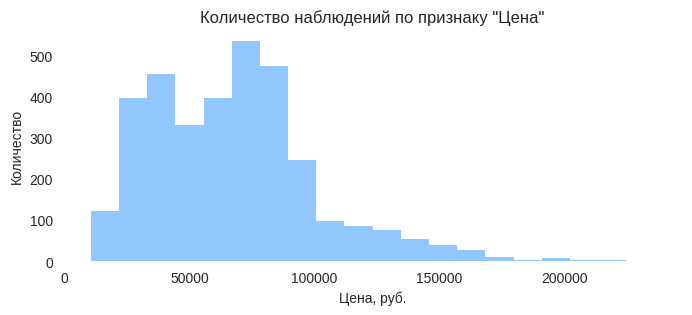

In [273]:
plt.style.use('seaborn-pastel')
plt.rcParams['axes.facecolor'] = 'white'
f, ax = plt.subplots(figsize=(8, 3))
plt.hist(df_price['price'], bins=20)
plt.title('Количество наблюдений по признаку "'+ russian_names_cols['price']+'"',  fontsize = 12)
plt.ylabel("Количество",  fontsize = 10)
plt.xlabel(russian_names_cols['price']+', руб.', fontsize = 10)
plt.grid(visible=None)
plt.show()

> *Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)*

> *Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)*

In [274]:
print('коэффициент ассиметрии по признаку',russian_names_cols['price'], ':',round(df.price.skew(), 2))
print('коэффициент эксцесса по признаку',russian_names_cols['price'], ':',round(df.price.kurtosis(), 2))

коэффициент ассиметрии по признаку Цена : 0.94
коэффициент эксцесса по признаку Цена : 1.45


Гистограмма показывает, что выборка не является нормально распределенной, однако два коэффициента ассиметрии и эксцесса дают противоречивые результаты . Проверим далее это свойство выборки с посмощью критерия Шапиро-Уилка

**Тест на нормальность распределения (Критерий Шапиро-Уилка)**

**Гипотеза H0**: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05

In [275]:
print('Критерий Шапиро-Уилка для :\n')
sh = stats.shapiro(df_price['price'])
if sh[1] < 0.05:
  result = 'Отклоняем гипозу H0: выборка не принадлежит нормальной генеральной совокупности.'
else:
  result = 'Нет оснований отклонить гипотезу H0: выборка принадлежит нормальной генеральной совокупности.'
print('-',russian_names_cols['price'], ':', sh, '\n\n', result)

Критерий Шапиро-Уилка для :

- Цена : ShapiroResult(statistic=0.943752646446228, pvalue=5.404462929245126e-34) 

 Отклоняем гипозу H0: выборка не принадлежит нормальной генеральной совокупности.


Визуализируем числовые признаки. которые представлены малым количеством значений с помощью столбчатых диаграмм.

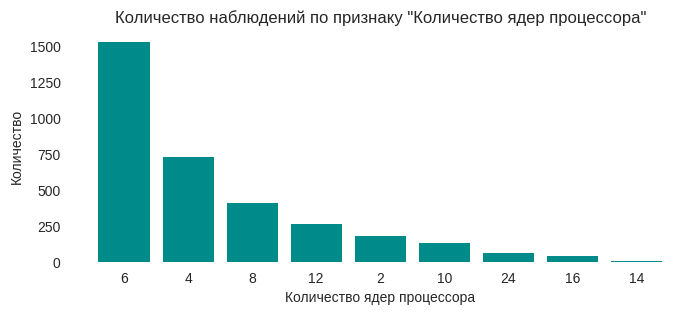

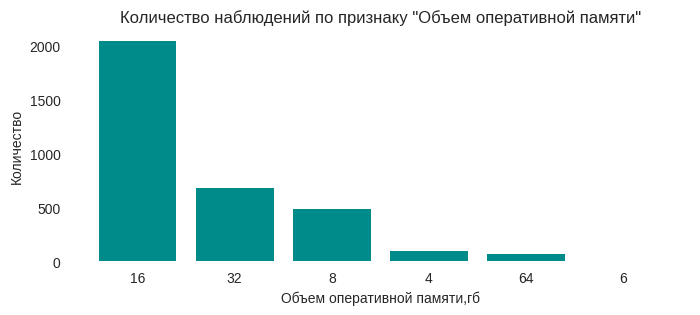

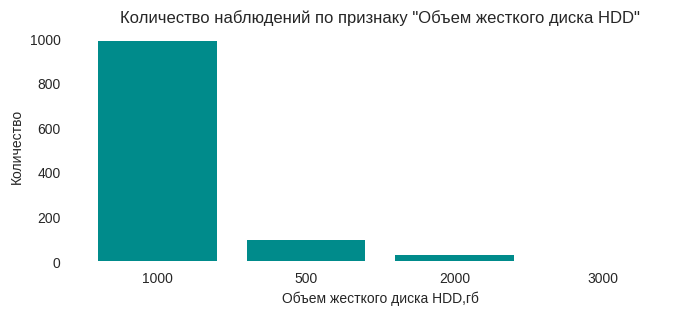

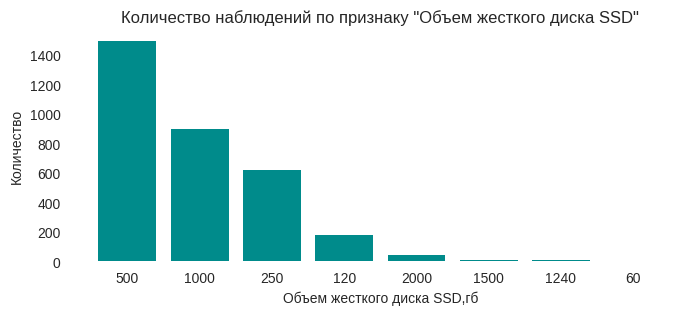

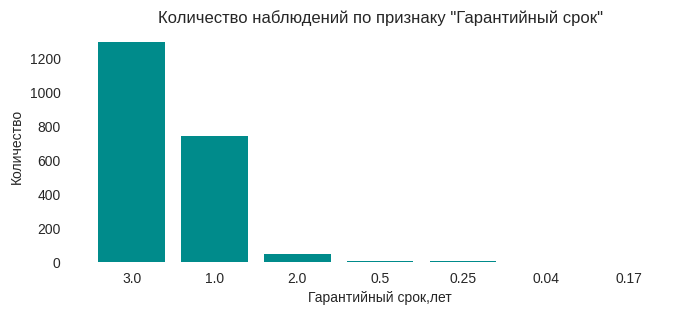

In [276]:
plt.style.use('seaborn-pastel')
plt.rcParams['axes.facecolor'] = 'white'
for col in ['proc_cores',	'ram', 'hdd_capacity', 'ssd_capacity', 'garant']:
  col_count = df_price[col].value_counts().sort_values(ascending=False)[:20]
  f, ax = plt.subplots(figsize=(8, 3))
  plt.bar(col_count.index.astype('str'), col_count, color='darkcyan')
  plt.title('Количество наблюдений по признаку "'+ russian_names_cols[col]+'"',  fontsize = 12)
  plt.ylabel("Количество",  fontsize = 10)
  plus = ''
  if col in ['ram', 'hdd_capacity', 'ssd_capacity']:
    plus = ',гб'
  if col == 'garant':
    plus = ',лет'
  plt.xlabel(russian_names_cols[col]+plus, fontsize = 10)
  # plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
  plt.grid(visible=None)
  plt.show()



Столбчатые диаграммы показывают, что самым полулярным значением у следующих признаков является:
* Количество ядер процессора - 6
* Объем оперативной памяти - 16
* Объем жесткого диска HDD -1000
* Объем жесткого диска SSD - 500
* Гарантийный срок - 3 года

В большинстве своем топовое значение превышает остальные по своему количеству в разы.

определим ТОП-5 комплектующих (числовые признаки) в предложениях на рынке

Создадим датафрейм ТОП5 числовых признаков для последующего сопоставления с такими же признаками по продажам

In [277]:
count = df_price['price'].count()
print("ТОП-5 комплектующих (числовые признаки) в предложениях на рынке")
top5 = 0
def top5_shares(col, count):
  top5 = df_price.groupby(col)['price'].count().sort_values(ascending=False)[:5]
  items = pd.concat([pd.DataFrame(top5), pd.DataFrame([russian_names_cols[col] for x in range(len(top5.index))], index = top5.index ).rename(columns={0:'Признак'}) ,
                     pd.DataFrame(round(top5 / count *100)).rename(columns={'price':'% в предложениях'})], axis=1)
  print('Количество продаж в категории:', russian_names_cols[col], ":")
  for i, row in items.iterrows():
    if int(row[2]) > 0:
      print(i,'- доля ввыборке - ',int(row[2]),'%')
  return items.drop(columns='price')

top5_price_num = pd.concat([top5_shares('proc_cores', count),top5_shares('ram', count), \
                           top5_shares('hdd_capacity', count),top5_shares('ssd_capacity', count)])


ТОП-5 комплектующих (числовые признаки) в предложениях на рынке
Количество продаж в категории: Количество ядер процессора :
6 - доля ввыборке -  46 %
4 - доля ввыборке -  22 %
8 - доля ввыборке -  12 %
12 - доля ввыборке -  8 %
2 - доля ввыборке -  5 %
Количество продаж в категории: Объем оперативной памяти :
16 - доля ввыборке -  61 %
32 - доля ввыборке -  20 %
8 - доля ввыборке -  14 %
4 - доля ввыборке -  3 %
64 - доля ввыборке -  2 %
Количество продаж в категории: Объем жесткого диска HDD :
1000 - доля ввыборке -  29 %
500 - доля ввыборке -  3 %
2000 - доля ввыборке -  1 %
Количество продаж в категории: Объем жесткого диска SSD :
500 - доля ввыборке -  44 %
1000 - доля ввыборке -  27 %
250 - доля ввыборке -  18 %
120 - доля ввыборке -  5 %
2000 - доля ввыборке -  1 %


**Анализ числовых и ранговых признаков - Вывод**

* Цена на компьютеры на компьютеры в представленной выборке изменяется от 10541р до 235900р. Половина наблюдений лежат ниже 66737р. 75% наблюдений меньше 84392р. Средняя цена - 67582р.90% значений меньше или равны 109680р

* Количество ядер процессора в представленной выборке изменяются от 2 до 24. Половина наблюдений равно 6. 75% наблюдений меньше или равно 8.90% значений меньше или равны 12.

* Количество оперативной памяти в представленной выборке изменяются от 4 до 64. Половина наблюдений равно 16. 75% наблюдений меньше или равно 16.90% значений меньше или равны 32Гб.

* Жесткий диск HDD в представленной выборке изменяются от 500 до 3000Гб. Половина наблюдений равно 1000. 75% наблюдений меньше или равно 1000. 90% значений меньше или равны 1000.

* Жесткий диск SSD в представленной выборке изменяются от 60 до 2000Гб. Половина наблюдений равно 500. 75% наблюдений меньше или равно 1000. 90% значений меньше или равны 1000.

* Гарантийный срок  в представленной выборке изменяются от 14 дней до 3 лет. 50% наблюдений меньше или равно 3 годам.

Гистограмма Цены показала, что выборка не являетс янормально распределенной, однако два коэффициента ассиметрии и эксцесса дали противоречивые результаты . C помощью критерия Шапиро-Уилка было доказано, что распределение этого признака не является номальным

Столбчатые диаграммы показывают, что самым полулярным значением у следующих признаков является:
* Количество ядер процессора - 6
* Объем оперативной памяти - 16
* Объем жесткого диска HDD -1000
* Объем жесткого диска SSD - 500
* Гарантийный срок - 3 года

В большинстве своем топовое значение превышает остальные по своему количеству в разы.

ТОП-5 комплектующих (числовые признаки) в предложениях на рынке

Количество продаж в категории: Количество ядер процессора :
* 6 - доля ввыборке -  46 %
* 8 - доля ввыборке -  22 %
* 4 - доля ввыборке -  12 %
* 12 - доля ввыборке -  8 %
* 10 - доля ввыборке -  5 %

Количество продаж в категории: Объем оперативной памяти :
* 16 - доля ввыборке -  61 %
* 32 - доля ввыборке -  20 %
* 8 - доля ввыборке -  14 %
* 64 - доля ввыборке -  3 %
* 4 - доля ввыборке -  2 %

Количество продаж в категории: Объем жесткого диска HDD :
* 1000 - доля ввыборке -  29 %
* 2000 - доля ввыборке -  3 %
* 500 - доля ввыборке -  1 %

Количество продаж в категории: Объем жесткого диска SSD :
* 500 - доля ввыборке -  44 %
* 1000 - доля ввыборке -  27 %
* 250 - доля ввыборке -  18 %
* 120 - доля ввыборке -  5 %
* 2000 - доля ввыборке -  1 %

##✔ *Анализ категориальных признаков*

In [278]:
df_price_types_obj = ['video_proc', 'OS', 'proc_type', 'ram_type']

**Столбчатые Диаграммы:**

In [279]:
# Процедура отрисовки графика с процентами
def draw_graph(data, total_count):
  data = data[data.index!=0]
  percents = np.array([round(x / total_count * 100, 1) for x in data])
  result = dict(zip(data.index, percents))
  x_axes = list(result.values())

  graph = plt.barh([str(x) for x in data.index], data.values)
  # graph.set_facecolor('xkcd:mint green')

  for i, v in enumerate(x_axes):
    width = graph[i].get_width()
    plt.text(width + 3 , i, str(v)+'%', color='black', fontweight='bold')
    graph[i].set_width(width+2)
  return graph

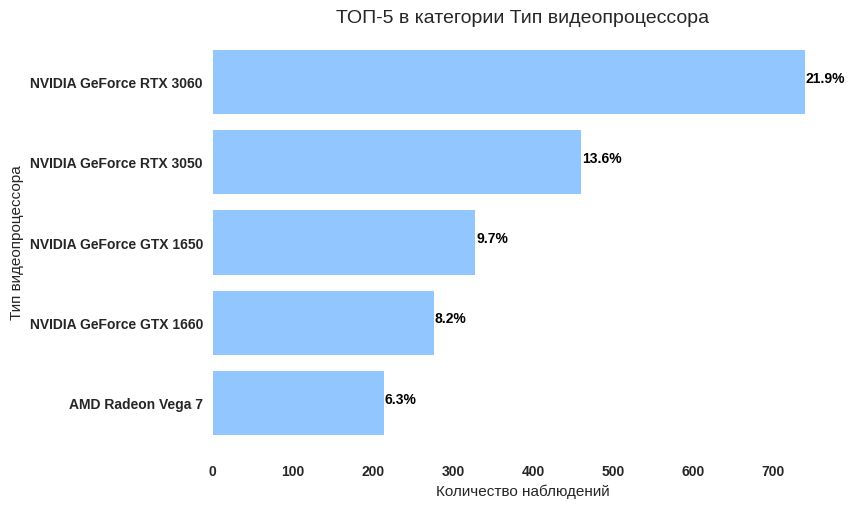

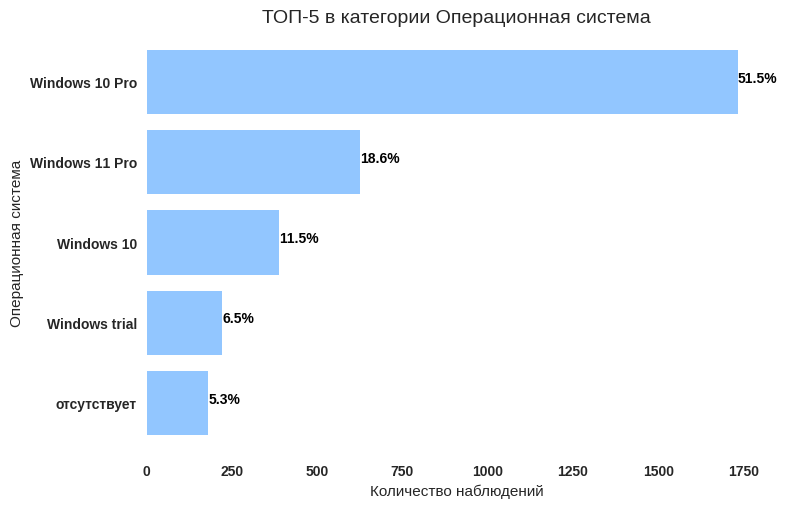

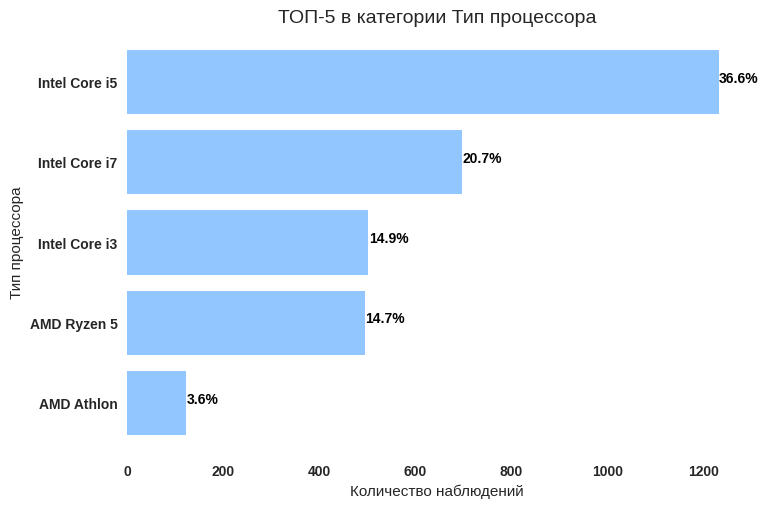

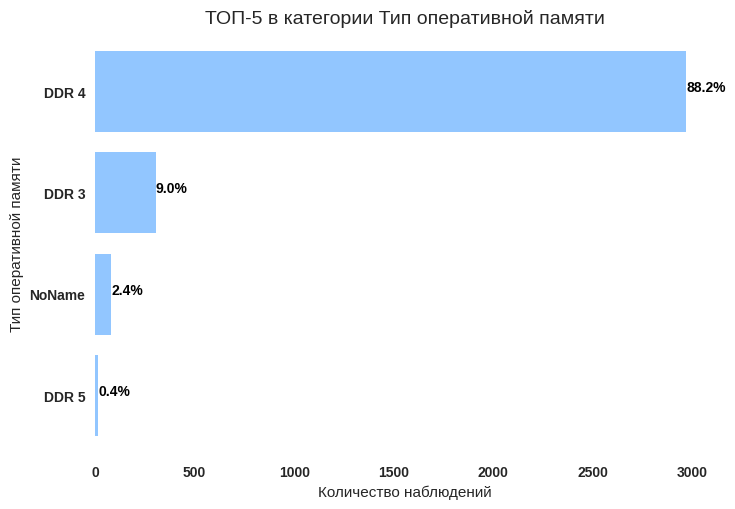

In [280]:
plt.style.use('seaborn-pastel')
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots()
for col in df_price_types_obj:
  data = df_price[col].value_counts().sort_values().iloc[-5:]

  draw_graph(data, df_price[col].count())

  plt.xlabel("Количество наблюдений")
  plt.ylabel(russian_names_cols[col])
  plt.xticks(fontweight='bold')
  plt.yticks(fontweight='bold')


  plt.title('ТОП-5 в категории ' + russian_names_cols[col], fontsize = 14)
  # plt.savefig('top5_'+col+'.png',  bbox_inches='tight')
  plt.grid(visible=None)
  plt.show()
  print('\n\n')

**Описательные характеристики категориальных признаков**

In [281]:
df_price[df_price_types_obj].describe()

,video_proc,OS,proc_type,ram_type
count,3360,3360,3360,3360
unique,55,14,20,4
top,NVIDIA GeForce RTX 3060,Windows 10 Pro,Intel Core i5,DDR 4
freq,737,1731,1229,2965


**Анализ категориальных признаков - Вывод**

In [282]:
count = df_price['price'].count()
print("ТОП-5 комплектующих (категориальные признаки) в предложениях на рынке")
top5 = 0
def top5_shares(col, count):
  top5 = df_price.groupby(col)['price'].count().sort_values(ascending=False)[:5]
  items = pd.concat([pd.DataFrame(top5), pd.DataFrame([russian_names_cols[col] for x in range(len(top5.index))], index = top5.index ).rename(columns={0:'Признак'}) ,
                     pd.DataFrame(round(top5 / count *100)).rename(columns={'price':'% в предложениях'})], axis=1)
  print('Количество продаж в категории:', russian_names_cols[col], ":")
  for i, row in items.iterrows():
    if int(row[2]) > 0:
      print(i,'- доля ввыборке - ',int(row[2]),'%')
  return items.drop(columns='price')

top5_price_obj = pd.concat([top5_shares('video_proc', count),top5_shares('OS', count), \
                           top5_shares('proc_type', count),top5_shares('ram_type', count)])

ТОП-5 комплектующих (категориальные признаки) в предложениях на рынке
Количество продаж в категории: Тип видеопроцессора :
NVIDIA GeForce RTX 3060 - доля ввыборке -  22 %
NVIDIA GeForce RTX 3050 - доля ввыборке -  14 %
NVIDIA GeForce GTX 1650 - доля ввыборке -  10 %
NVIDIA GeForce GTX 1660 - доля ввыборке -  8 %
AMD Radeon Vega 7 - доля ввыборке -  6 %
Количество продаж в категории: Операционная система :
Windows 10 Pro - доля ввыборке -  52 %
Windows 11 Pro - доля ввыборке -  19 %
Windows 10 - доля ввыборке -  11 %
Windows trial - доля ввыборке -  7 %
отсутствует - доля ввыборке -  5 %
Количество продаж в категории: Тип процессора :
Intel Core i5 - доля ввыборке -  37 %
Intel Core i7 - доля ввыборке -  21 %
Intel Core i3 - доля ввыборке -  15 %
AMD Ryzen 5 - доля ввыборке -  15 %
AMD Athlon - доля ввыборке -  4 %
Количество продаж в категории: Тип оперативной памяти :
DDR 4 - доля ввыборке -  88 %
DDR 3 - доля ввыборке -  9 %
NoName - доля ввыборке -  2 %


##✔ *Анализ взаимосвязи числовых и ранговых признаков*

Т.к. признак price не имеет нормального распределенния (выше мы проводили тест Шапиро-Уилка), а также пресутствие в выборке рангового признака garant, то для анализа взаимной корреляции числовых и ранговых признаков будем применять метод Спирмена

In [283]:
df_price.corr(method='spearman')

,price,proc_cores,ram,hdd_capacity,ssd_capacity,garant
price,1.000000,0.657171,0.539328,0.478525,0.519159,0.147581
proc_cores,0.657171,1.000000,0.446677,0.321687,0.422841,-0.049340
ram,0.539328,0.446677,1.000000,0.381825,0.384963,0.205908
hdd_capacity,0.478525,0.321687,0.381825,1.000000,0.219975,0.387654
ssd_capacity,0.519159,0.422841,0.384963,0.219975,1.000000,0.157604
garant,0.147581,-0.049340,0.205908,0.387654,0.157604,1.000000


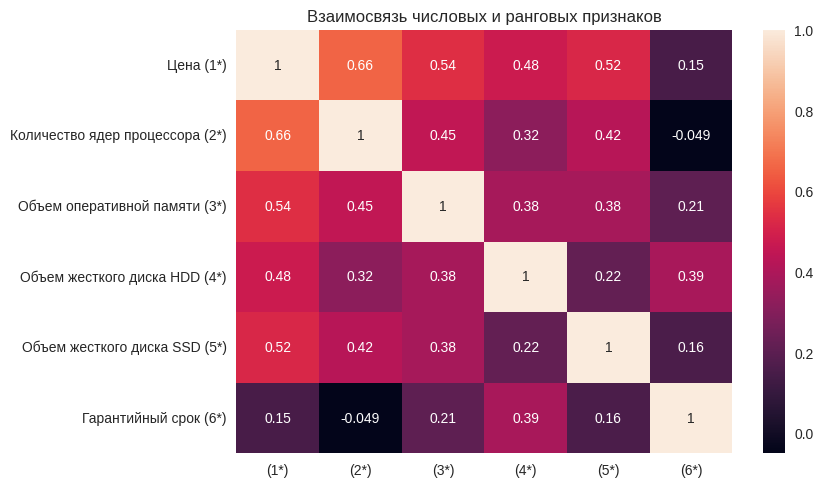

In [284]:
plt.title('Взаимосвязь числовых и ранговых признаков')
x = [russian_names_cols['price'] + ' (1*)',	russian_names_cols['proc_cores']+ ' (2*)',	russian_names_cols['ram']+ ' (3*)',
     russian_names_cols['hdd_capacity'] + ' (4*)',	russian_names_cols['ssd_capacity']+ ' (5*)',	russian_names_cols['garant']+ ' (6*)']
y = ['(1*)','(2*)','(3*)','(4*)','(5*)','(6*)']
hm = sns.heatmap(df_price.corr(method='spearman'), annot=True, yticklabels=x, xticklabels=y)
plt.show()

***Признак "Цена"***

Самая высока корреляция между ценой и количеством ядер процессора. Так же заслуживает внимания и дальнейшего рассмотрения корреляции
* цены и объема оперативной памяти,
* цены и объема жесткого SSD диска.



Проверим значимость взаимных связей между признаком "Цена" и другими числовыми и ранговыми признаками

**Корреляция Спирмена для признака Цена**

**Гипотеза Н0: связь между признаками отсутствует или она равна 0**

In [285]:
for col in ['proc_cores', 'ram',	'hdd_capacity',	'ssd_capacity',	'garant']:
  print('Цена /', col,'--->', scipy.stats.spearmanr(df_price[df_price[col].notna()]['price'], df_price[col].dropna()))

Цена / proc_cores ---> SignificanceResult(statistic=0.6571711104414192, pvalue=0.0)
Цена / ram ---> SignificanceResult(statistic=0.5393280263284808, pvalue=5.89607819459856e-253)
Цена / hdd_capacity ---> SignificanceResult(statistic=0.4785247090508101, pvalue=1.1863781070728944e-64)
Цена / ssd_capacity ---> SignificanceResult(statistic=0.5191585040125204, pvalue=2.5284475964911848e-223)
Цена / garant ---> SignificanceResult(statistic=0.14758114102385353, pvalue=1.0860163454593109e-11)


**Вывод** : Т.к. наблюдаемое значение p-value у всех признаков < 0.05 можно сделать вывод, что все числовые и ранговые признаки имеют статистически значимую связь с признаком "Цена".

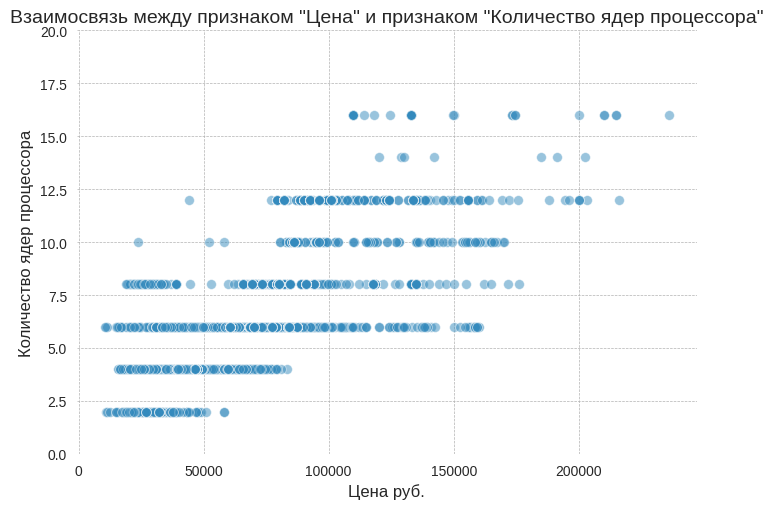

In [351]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Взаимосвязь между признаком "Цена" и признаком "Количество ядер процессора"',  fontsize = 14)
plt.xlabel(russian_names_cols['price']+' руб.', fontsize=12)
plt.ylabel(russian_names_cols['proc_cores'], fontsize=12)
plt.ylim(0,20)
sns.scatterplot(x="price",y='proc_cores', data=df_price, alpha=0.5)
plt.show()

На графике мы можем видеть что происходит смещение цены в сторону больших значений с увеличением количества ядер процессора

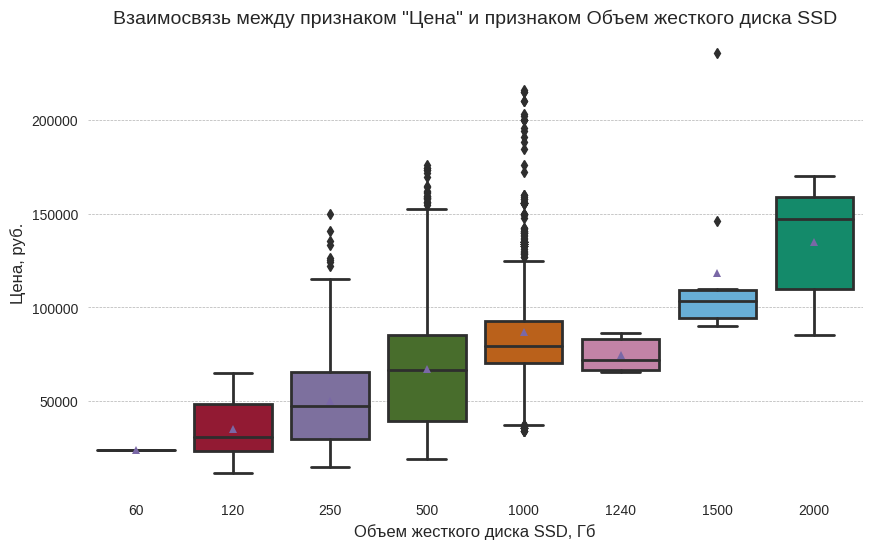

In [353]:
plt.rcParams['axes.facecolor'] = 'white'
f, ax = plt.subplots(figsize=(10, 6))
# plt.ylabel(russian_names_cols['price'], fontsize=12)
# plt.xlabel(russian_names_cols['ssd_capacity'], fontsize=12)
plt.title('Взаимосвязь между признаком "Цена" и признаком '+russian_names_cols['ssd_capacity'],  fontsize = 14)
ax = sns.boxplot(x='ssd_capacity', y='price', data=df_price[df_price.ssd_capacity.notna()], showmeans=True)
ax.set(xlabel=russian_names_cols['ssd_capacity']+', Гб' , ylabel='Цена, руб.')
plt.show()

На графике мы четко видем как увеличивается средняя цена компьютера с ростом объема SSD-диска

**Анализ взаимосвязи числовых и ранговых признаков - Вывод**

***Признак "Цена"***

Проведенный статистический тест показал что все числовые и ранговые (количество ядер процессора, объем оперативной памяти,	объем жесткого hdd диска,	объем жеского ssdдиска,	гарантийный срок) признаки имеют статистически значимую связь с признаком "Цена".

Наболее сильная связь у цены с Количеством ядер процессора, объемом SSD-диска и объемом опреативной памяти.


##✔ *Анализ взаимосвязи категориальных признаков*

В рамках данного кейса взаимосвязь категориальных признаков между собой для признака "Цена" не даст ответов на поставленные Заказчиком вопросы, поэтому переходим к "Анализу взаимосвязи числовых и категориальных признаков"

##✔ *Анализ взаимосвязи числовых и категориальных признаков*

In [288]:
for col in ['sales_group', 'video_proc','OS','proc_type','ram_type', 'video_proc_group','OS_group','proc_type_group']:
  print('Количество групп по признаку', col,':', len(df_price[col].unique()))

Количество групп по признаку sales_group : 6
Количество групп по признаку video_proc : 55
Количество групп по признаку OS : 14
Количество групп по признаку proc_type : 20
Количество групп по признаку ram_type : 4
Количество групп по признаку video_proc_group : 4
Количество групп по признаку OS_group : 3
Количество групп по признаку proc_type_group : 2


Количество групп у категориальных признаков очень большое. Поэтому возмем для анализа признаки
* video_proc_group - группа типов видеопроцессоров (бренд)
* OS_group - группа операционных систем
* proc_type_group - группа типов процессоров
* ram_type - тип оперативной памяти


**video_proc_group** - **price**

In [289]:
df_price.groupby('video_proc_group')[['price']].mean()

,price
video_proc_group,
AMD,39340.047009
Intel,27325.530488
NVIDIA,78027.930751
прочее,32626.250000


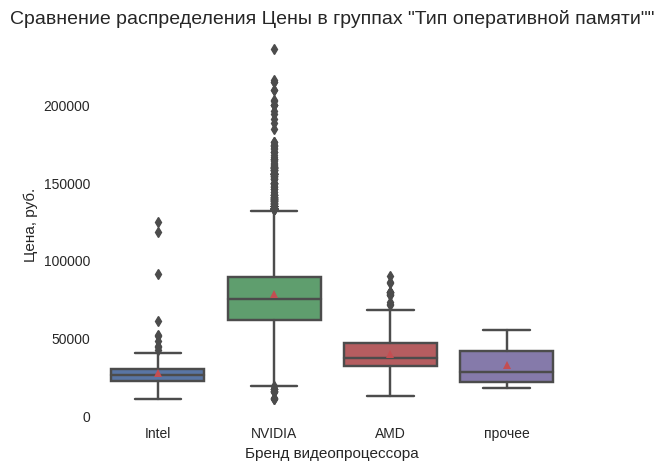

In [354]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'white'
f, ax = plt.subplots(figsize=(6, 5))
plt.title('Сравнение распределения Цены в группах "Тип оперативной памяти""',  fontsize = 14)
ax = sns.boxplot(x='video_proc_group', y='price', data=df_price, showmeans=True)
ax.set(xlabel=russian_names_cols['video_proc_group'], ylabel='Цена, руб.')
plt.show()

Видим, что средняя цена по брендам видеопроцессора существенно отличается, проверим это тестом

In [291]:
d1=np.array(df_price[df_price.video_proc_group == 'AMD']['price'])
d2=np.array(df_price[df_price.video_proc_group == 'Intel']['price'])
d3=np.array(df_price[df_price.video_proc_group == 'NVIDIA']['price'])
d4=np.array(df_price[df_price.video_proc_group == 'прочее']['price'])

проверим нормальность полученных выборок

**Тест Шапиро-Уилка - Гипотеза Н0** : Выборки соответсвуют нормальному распределению

In [292]:
print('Критерий Шапиро-Уилка для : d1 --->', stats.shapiro(d1))
print('Критерий Шапиро-Уилка для : d2 --->', stats.shapiro(d2))
print('Критерий Шапиро-Уилка для : d3 --->', stats.shapiro(d3))
print('Критерий Шапиро-Уилка для : d4 --->', stats.shapiro(d4))

Критерий Шапиро-Уилка для : d1 ---> ShapiroResult(statistic=0.9250043034553528, pvalue=1.5552622666288596e-14)
Критерий Шапиро-Уилка для : d2 ---> ShapiroResult(statistic=0.5983827114105225, pvalue=6.634666109926721e-27)
Критерий Шапиро-Уилка для : d3 ---> ShapiroResult(statistic=0.9389135837554932, pvalue=3.1906981540782026e-31)
Критерий Шапиро-Уилка для : d4 ---> ShapiroResult(statistic=0.8808277249336243, pvalue=0.191788449883461)


**Тест Шапиро-Уилка - Вывод:** Совокупно для всех 4 выборок, гипотеза о нормальности распределений не принимается

Выбираем непараметрический критерий для сравнения более двух групп - Краскала-Уолеса

**Тест Краскала-Уолеса - Гипотеза H0** : Средние показатели признака price в разрезе категорий равны (статистически значимых различий нет)

In [293]:
stats.mstats.kruskalwallis(d1,d2,d3,d4)

KruskalResult(statistic=1409.8059067788995, pvalue=2.1946461911618905e-305)

**Тест Краскала-Уолеса - Вывод**
Отличия в категории "Бренд видеопроцессора" для признака "Цена" являются статистистически значимыми

**OS_group** - **price**

In [294]:
df_price.groupby('OS_group')[['price']].mean()

,price
OS_group,
Windows 10,67044.065179
Windows 11,78547.403933
прочее,54413.457516


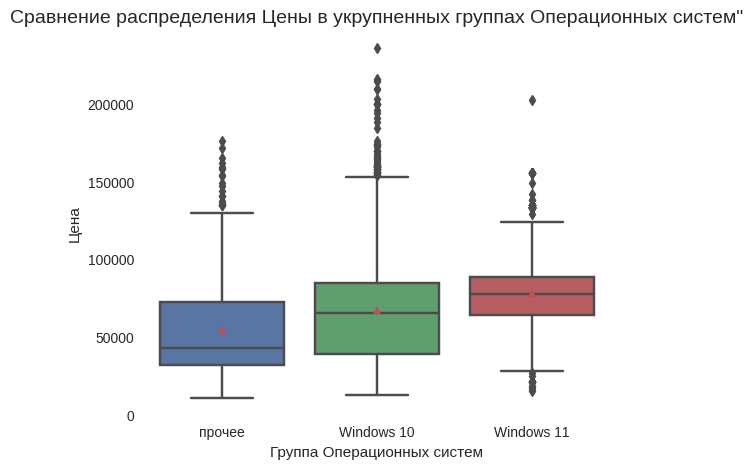

In [295]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'white'
f, ax = plt.subplots(figsize=(6, 5))
plt.title('Сравнение распределения Цены в укрупненных группах Операционных систем"',  fontsize = 14)
ax = sns.boxplot(x='OS_group', y='price', data=df_price, showmeans=True)
ax.set(xlabel='Группа Операционных систем', ylabel='Цена')
plt.show()

Видим, что средняя цена по группам Операционных систем существенно отличается, проверим это тестом

In [296]:
d1=np.array(df_price[df_price.OS_group == 'Windows 10']['price'])
d2=np.array(df_price[df_price.OS_group == 'Windows 11']['price'])
d3=np.array(df_price[df_price.OS_group == 'прочее']['price'])

**Тест Шапиро-Уилка - Гипотеза Н0** : Выборки соответсвуют нормальному распределению

In [297]:
print('Критерий Шапиро-Уилка для : d1 --->', stats.shapiro(d1))
print('Критерий Шапиро-Уилка для : d2 --->', stats.shapiro(d2))
print('Критерий Шапиро-Уилка для : d3 --->', stats.shapiro(d3))

Критерий Шапиро-Уилка для : d1 ---> ShapiroResult(statistic=0.9347090125083923, pvalue=2.8622926330658128e-30)
Критерий Шапиро-Уилка для : d2 ---> ShapiroResult(statistic=0.9475041031837463, pvalue=1.462364605765102e-14)
Критерий Шапиро-Уилка для : d3 ---> ShapiroResult(statistic=0.8662080764770508, pvalue=2.1066258439346032e-19)


 **Тест Шапиро-Уилка - Вывод** : Ни одна из 4 выборок не имеет нормального распределения - совокупно для всех гипоза отклоняется

Выбираем непараметрический критерий для сравнения более двух групп - Краскала-Уолеса

**Тест Краскала-Уолеса - Гипотеза H0** : Средние показатели признака price в разрезе категорий групп Операционных систем равны (статистически значимых различий нет)


In [298]:
stats.mstats.kruskalwallis(d1,d2,d3)

KruskalResult(statistic=216.71954457592557, pvalue=8.708609863312082e-48)

**Тест Краскала-Уолеса - Вывод**

Анализ проведен по 3 укрупненым группам Операционных систем. Отличия в этой категории для Цены - являются статистистически значимыми

**proc_type_group** - **price**

In [299]:
df_price.groupby('proc_type_group')[['price']].mean()

,price
proc_type_group,
AMD,56987.317500
Intel,70892.368359


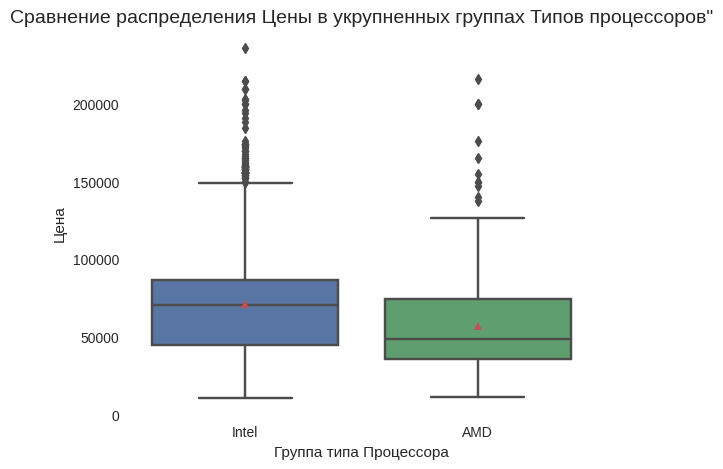

In [300]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'white'
f, ax = plt.subplots(figsize=(6, 5))
plt.title('Сравнение распределения Цены в укрупненных группах Типов процессоров"',  fontsize = 14)
ax = sns.boxplot(x='proc_type_group', y='price', data=df_price, showmeans=True)
ax.set(xlabel='Группа типа Процессора', ylabel='Цена')
plt.show()

Видим, что средняя цена по группам Типов Процессоров существенно отличается, проверим это тестом

In [301]:
d1=np.array(df_price[df_price. proc_type_group == 'AMD']['price'])
d2=np.array(df_price[df_price.proc_type_group == 'Intel']['price'])


**Тест Шапиро-Уилка - Гипотеза Н0** : Выборки соответсвуют нормальному распределению

In [302]:
print('Критерий Шапиро-Уилка для : d1 --->', stats.shapiro(d1))
print('Критерий Шапиро-Уилка для : d2 --->', stats.shapiro(d2))

Критерий Шапиро-Уилка для : d1 ---> ShapiroResult(statistic=0.9034495949745178, pvalue=4.670139357749002e-22)
Критерий Шапиро-Уилка для : d2 ---> ShapiroResult(statistic=0.9528864622116089, pvalue=5.748832032000387e-28)


 **Тест Шапиро-Уилка - Вывод** : Ни одна из 2 выборок не имеет нормального
распределения - совокупно для всех гипоза отклоняется

Выбираем непараметрический критерий для сравнения двух групп - тест Манна-Уитни

**Тест Манна-Уитни - Гипотеза H0** : статистически значимых различий в группах Типов процессоров нет


In [303]:
scipy.stats.mannwhitneyu(d1,d2)

MannwhitneyuResult(statistic=774963.5, pvalue=2.5287780775632773e-25)

**Тест Манна-Уитни - Вывод**

Анализ проведен по 2 укрупненым группам Типов процессоров. Отличия в этой категории для Цены - являются статистистически значимыми

**ram_type** - **price**

In [304]:
df_price.groupby('ram_type')[['price']].mean()

,price
ram_type,
DDR 3,30851.347682
DDR 4,71557.350759
DDR 5,161097.928571
NoName,42206.253165


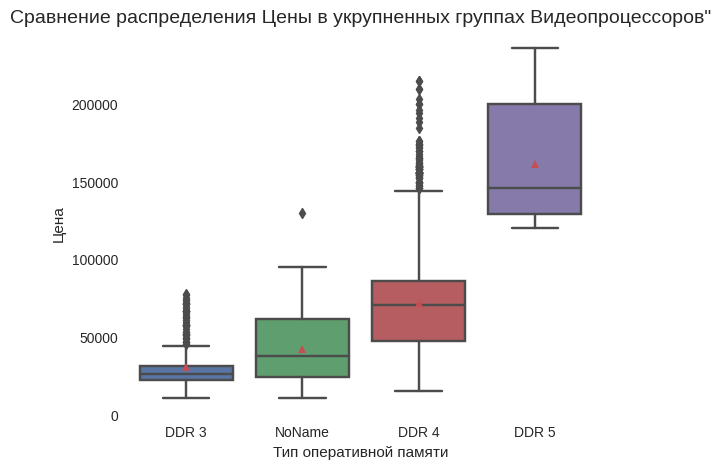

In [305]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'white'
f, ax = plt.subplots(figsize=(6, 5))
plt.title('Сравнение распределения Цены в группах Ти"',  fontsize = 14)
ax = sns.boxplot(x='ram_type', y='price', data=df_price, showmeans=True)
ax.set(xlabel='Тип оперативной памяти', ylabel='Цена')
plt.show()

Видим, что средняя цена по типам оперативной памяти существенно отличается, проверим это тестом

In [306]:
df_price.ram_type.unique()

array(['DDR 3', 'NoName', 'DDR 4', 'DDR 5'], dtype=object)

In [307]:
d1=np.array(df_price[df_price.ram_type == 'DDR 3']['price'])
d2=np.array(df_price[df_price.ram_type == 'NoName']['price'])
d3=np.array(df_price[df_price.ram_type == 'DDR 4']['price'])
d4=np.array(df_price[df_price.ram_type == 'DDR 5']['price'])

In [308]:
print('Критерий Шапиро-Уилка для : d1 --->', stats.shapiro(d1))
print('Критерий Шапиро-Уилка для : d2 --->', stats.shapiro(d2))
print('Критерий Шапиро-Уилка для : d3 --->', stats.shapiro(d3))
print('Критерий Шапиро-Уилка для : d4 --->', stats.shapiro(d4))

Критерий Шапиро-Уилка для : d1 ---> ShapiroResult(statistic=0.768095850944519, pvalue=2.330301879293992e-20)
Критерий Шапиро-Уилка для : d2 ---> ShapiroResult(statistic=0.9260578155517578, pvalue=0.00020456960191950202)
Критерий Шапиро-Уилка для : d3 ---> ShapiroResult(statistic=0.9461485743522644, pvalue=1.237394120095063e-31)
Критерий Шапиро-Уилка для : d4 ---> ShapiroResult(statistic=0.8539844155311584, pvalue=0.025167902931571007)


 **Тест Шапиро-Уилка - Вывод** : ни одна из 4 выборок не имеет нормального распределения - совокупно для всех гипоза отклоняется

Выбираем непараметрический критерий для сравнения более двух групп - Краскала-Уолеса

**Тест Краскала-Уолеса - Гипотеза H0** : Средние показатели признака price в разрезе категорий типов оперативной памяти равны (статистически значимых различий нет)


In [309]:
stats.mstats.kruskalwallis(d1,d2,d3,d4)

KruskalResult(statistic=648.8368064587903, pvalue=2.6034740469845993e-140)

**Тест Краскала-Уолеса - Вывод**

Анализ проведен по 4 типам Оперативной памяти. Отличия в этой категории для Цены - являются статистистически значимыми

**sales_group** - **price**

In [310]:
df_price.groupby('sales_group')[['price']].mean().sort_index()

,price
sales_group,
10,47509.932584
100 и более,40705.937500
20,54288.051282
30 - 90,45153.127273
5,60750.607509


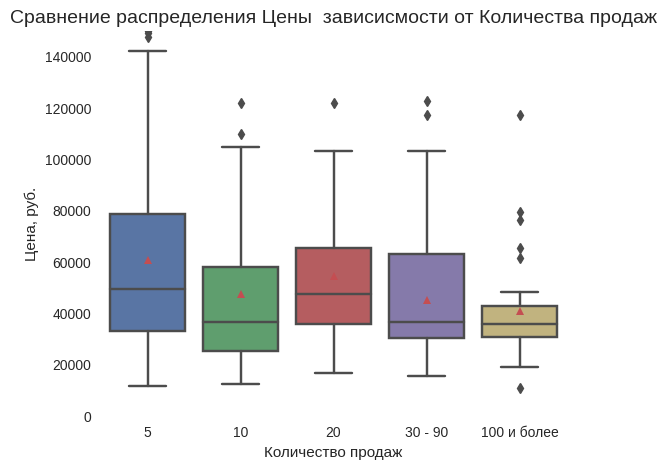

In [355]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'white'
f, ax = plt.subplots(figsize=(6, 5))
order = ['5', '10', '20', '30 - 90', '100 и более']
plt.title('Сравнение распределения Цены  зависисмости от Количества продаж',  fontsize = 14)
plt.ylim(0, 150000)
ax = sns.boxplot(x='sales_group', y='price', data=df_price[df_price['sales_group'].notna()], showmeans=True, order=order)
ax.set(xlabel='Количество продаж', ylabel='Цена, руб.')
plt.show()

Видим, что средняя цена по Количеству продаж существенно отличается, проверим это тестом

In [312]:
df_price.sales_group.unique()

array(['100 и более', <NA>, '10', '30 - 90', '5', '20'], dtype=object)

In [313]:
d1=np.array(df_price[df_price['sales_group'].notna()][df_price.sales_group == '5']['price'])
d2=np.array(df_price[df_price['sales_group'].notna()][df_price.sales_group == '10']['price'])
d3=np.array(df_price[df_price['sales_group'].notna()][df_price.sales_group == '20']['price'])
d4=np.array(df_price[df_price['sales_group'].notna()][df_price.sales_group == '30 - 90']['price'])
d5=np.array(df_price[df_price['sales_group'].notna()][df_price.sales_group == '100 и более']['price'])

In [314]:
print('Критерий Шапиро-Уилка для : d1 --->', stats.shapiro(d1))
print('Критерий Шапиро-Уилка для : d2 --->', stats.shapiro(d2))
print('Критерий Шапиро-Уилка для : d3 --->', stats.shapiro(d3))
print('Критерий Шапиро-Уилка для : d4 --->', stats.shapiro(d4))
print('Критерий Шапиро-Уилка для : d5 --->', stats.shapiro(d5))

Критерий Шапиро-Уилка для : d1 ---> ShapiroResult(statistic=0.8711777925491333, pvalue=1.3855612514077414e-21)
Критерий Шапиро-Уилка для : d2 ---> ShapiroResult(statistic=0.8115925192832947, pvalue=2.6780602180309643e-09)
Критерий Шапиро-Уилка для : d3 ---> ShapiroResult(statistic=0.744401216506958, pvalue=7.216831363621168e-07)
Критерий Шапиро-Уилка для : d4 ---> ShapiroResult(statistic=0.8656797409057617, pvalue=1.9384819097467698e-05)
Критерий Шапиро-Уилка для : d5 ---> ShapiroResult(statistic=0.816821277141571, pvalue=8.580317080486566e-05)


 **Тест Шапиро-Уилка - Вывод** : ни одна из 5 выборок не имеет нормального распределения - совокупно для всех гипоза отклоняется

Выбираем непараметрический критерий для сравнения более двух групп - Краскала-Уолеса

**Тест Краскала-Уолеса - Гипотеза H0** : Средние показатели признака price в разрезе категорий типов оперативной памяти равны (статистически значимых различий нет)


In [315]:
stats.mstats.kruskalwallis(d1,d2,d3,d4,d5)

KruskalResult(statistic=26.543673309415592, pvalue=2.4580711103121647e-05)

**Тест Краскала-Уолеса - Вывод**

Анализ проведен по 5 укрупненным группам количества продаж. Отличия в этой категории для Цены - являются статистистически значимыми

**Анализ взаимосвязи числовых и категориальных признаков - Вывод**

Проведенный анализ показателей (Тип оперативной памяти, Группы видеопроцессоров, Группы Операционных систем, Группы Процессоров, диапазонов количества продаж) показал, что все категориальные признаки имеют статистически значимое влияние на Цену компьютера.

В большей степени Цена зависит от Типа видеопроцессора и типа оперативной памяти.

Рейтинг степени влияния на целевую переменную "Цена" может выглядеть так:
1. Тип видеопроцессора
2. Тип оперативной памяти
3. Операционная система
4. Тип процессора
5. Количество продаж


## **Продажи**

In [316]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 4067
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sales             801 non-null    Int64  
 1   price             801 non-null    float64
 2   sales_group       801 non-null    object 
 3   feedbacks         526 non-null    Int64  
 4   seller_rating     749 non-null    float64
 5   video_proc        801 non-null    object 
 6   OS                801 non-null    object 
 7   proc_type         801 non-null    object 
 8   proc_cores        801 non-null    int64  
 9   ram_type          801 non-null    object 
 10  ram               801 non-null    int64  
 11  hdd_capacity      214 non-null    Int64  
 12  ssd_capacity      767 non-null    Int64  
 13  garant            729 non-null    Float64
 14  video_proc_group  801 non-null    object 
 15  proc_type_group   801 non-null    object 
 16  OS_group          801 non-null    object 
d

##✔ *Анализ числовых признаков и ранговых*

In [317]:
df_sales.describe()

,sales,price,feedbacks,seller_rating,proc_cores,ram,hdd_capacity,ssd_capacity,garant
count,801.0,801.000000,526.0,749.000000,801.000000,801.000000,214.0,767.0,729.0
mean,18.689139,57092.991261,16.893536,4.568491,5.755306,17.990012,962.616822,521.616688,2.444787
std,61.229829,36017.388955,40.231143,0.433609,2.734968,10.704200,370.261515,310.383817,0.873401
min,5.0,10805.000000,1.0,0.000000,2.000000,4.000000,500.0,120.0,0.25
25%,5.0,32394.000000,1.0,4.600000,4.000000,16.000000,1000.0,250.0,2.0
50%,5.0,44989.000000,3.0,4.700000,6.000000,16.000000,1000.0,500.0,3.0
75%,10.0,74872.000000,11.0,4.700000,6.000000,16.000000,1000.0,500.0,3.0
max,800.0,214954.000000,296.0,5.000000,24.000000,64.000000,2000.0,2000.0,3.0


In [318]:
df_sales.quantile(0.9)

sales                30.0
price            107521.0
feedbacks            44.5
seller_rating         4.8
proc_cores           10.0
ram                  32.0
hdd_capacity       1000.0
ssd_capacity       1000.0
garant                3.0
Name: 0.9, dtype: Float64

* Количество продаж компьютеров представленной выборке изменяется от 5 до 800. Половина наблюдений лежат ниже 5. 75% наблюдений меньше или равно 10. 90% наблюдений лежат ниже 30.

* Цена продаж компьютеров представленной выборке изменяется от 10805 до 214954. Половина наблюдений лежат ниже 44989. 75% наблюдений меньше или равно 74872.90% наблюдений лежат ниже 107521р.

* Количество отзывов представленной выборке изменяется от 1 до 296. Половина наблюдений лежат ниже 3. 75% наблюдений меньше или равно 9. 90% наблюдений лежат ниже 44.

* Рейтинг продавца в представленной выборке изменяется от 0 до 8. 75% наблюдений меньше 4,7. И лишь четверть оценок являются высокими от 4,7 до 5 баллов. 90% наблюдений лежат ниже 4,8.

* Количество ядер процессора в представленной выборке изменяются от 2 до 24. 75% наблюдений меньше или равно 6. 90% наблюдений лежат ниже 10.

* Количество оперативной памяти в представленной выборке изменяются от 4 до 64. 75% наблюдений меньше или равно 16. 90% наблюдений лежат ниже 32гб.

* Жесткий диск HDD в представленной выборке изменяются от 500 до 2000Гб. 75% наблюдений меньше или равно 1000. 90% наблюдений лежат ниже 1000гб.

* Жесткий диск SSD в представленной выборке изменяются от 120 до 2000Гб. 75% наблюдений меньше или равно 500. 90% наблюдений лежат ниже 1000гб.

* Гарантийный срок  в представленной выборке изменяются от 14 дней до 3 лет. 50% наблюдений равно 3 годам. 90% наблюдений лежат ниже 3 лет

**Столбчатые диаграммы**

---



Визуализируем числовые признаки. которые представлены малым количеством значений с помощью столбчатых диаграмм.

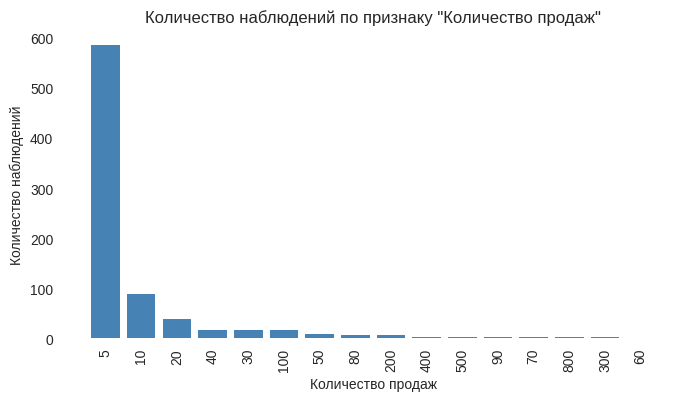

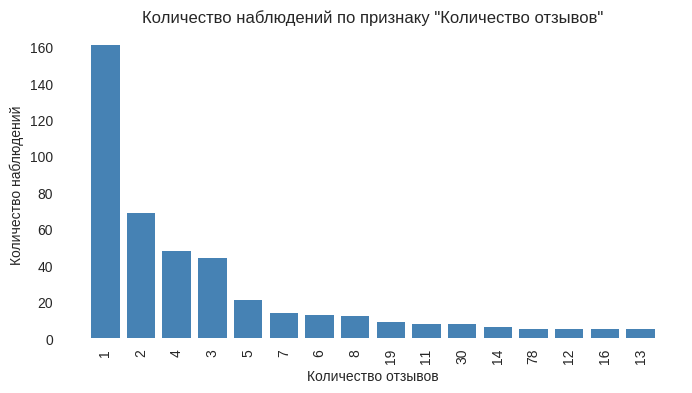

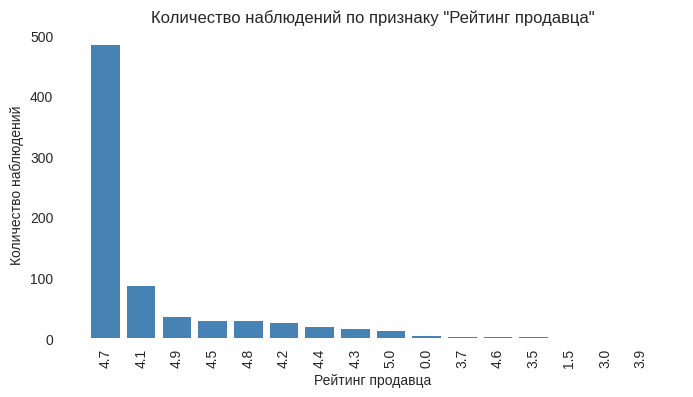

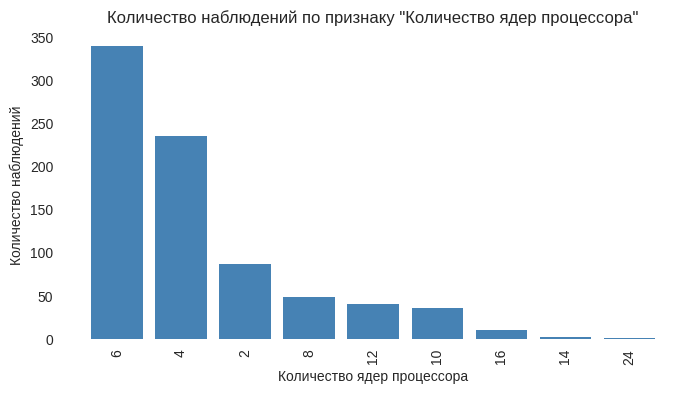

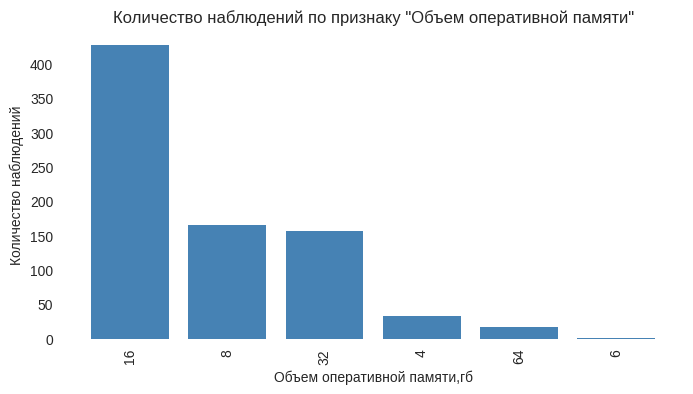

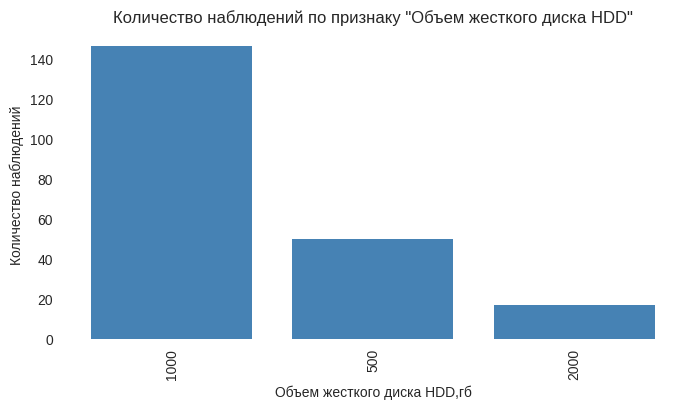

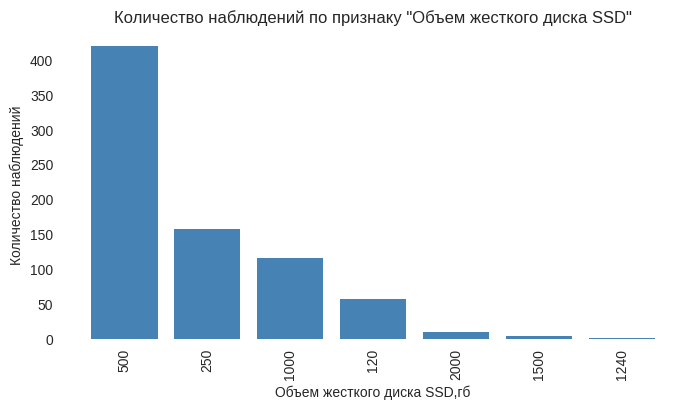

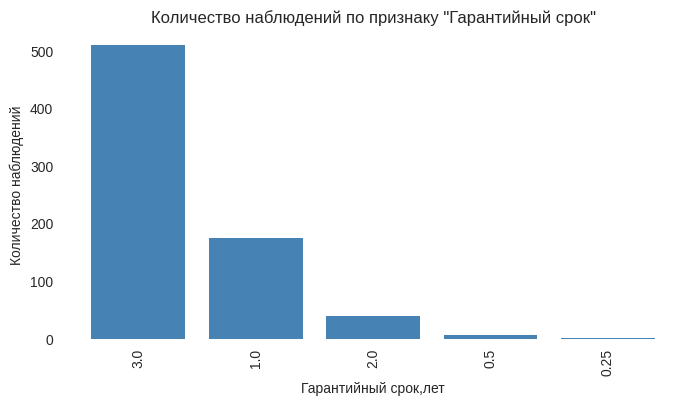

In [319]:
plt.style.use('seaborn-pastel')
plt.rcParams['axes.facecolor'] = 'white'
for col in ['sales','feedbacks','seller_rating','proc_cores','ram','hdd_capacity','ssd_capacity','garant']:
  col_count = df_sales[col].dropna().value_counts().sort_values(ascending=False)
  f, ax = plt.subplots(figsize=(8, 4))
  if col != 'seller_rating':
    col_count = col_count[:16]
  plt.bar(col_count.index.astype('str'), col_count[:], color='steelblue')
  plt.title('Количество наблюдений по признаку "'+ russian_names_cols[col]+'"',  fontsize = 12)
  plt.ylabel("Количество наблюдений",  fontsize = 10)
  plus = ''
  if col in ['ram', 'hdd_capacity', 'ssd_capacity']:
    plus = ',гб'
  if col == 'garant':
    plus = ',лет'
  plt.xlabel(russian_names_cols[col]+ plus, fontsize = 10)
  plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
  plt.show()

Столбчатые диаграммы показывают, что самым полулярным значением у следующих признаков является:
* Количество продаж - 5
* Количество отзывов - 1
* Количество баллов рейтинга продавца - 4,7
* Количество ядер процессора - 6
* Объем оперативной памяти - 16
* Объем жесткого диска HDD -1000
* Объем жесткого диска SSD - 500
* Гарантийный срок - 3 года

В большинстве своем топовое значение превышает остальные по своему количеству в разы.

In [320]:
count = df_sales['sales'].count()
print("ТОП-5 комплектующих (числовые признаки) в предложениях на рынке")
top5 = 0
def top5_shares(col, count):
  top5 = df_sales.groupby(col)['sales'].count().sort_values(ascending=False)[:5]
  items = pd.concat([pd.DataFrame(top5), pd.DataFrame([russian_names_cols[col] for x in range(len(top5.index))], index = top5.index ).rename(columns={0:'Признак'}) ,
                     pd.DataFrame(round(top5 / count *100)).rename(columns={'sales':'% в продажах'})], axis=1)
  print('Количество продаж в категории:', russian_names_cols[col], ":")
  for i, row in items.iterrows():
    if int(row[2]) > 0:
      print(i,'- доля ввыборке - ',int(row[2]),'%')
  return items.drop(columns='sales')

top5_sales_num = pd.concat([top5_shares('proc_cores', count),top5_shares('ram', count), \
                           top5_shares('hdd_capacity', count),top5_shares('ssd_capacity', count)])

ТОП-5 комплектующих (числовые признаки) в предложениях на рынке
Количество продаж в категории: Количество ядер процессора :
6 - доля ввыборке -  42 %
4 - доля ввыборке -  29 %
2 - доля ввыборке -  11 %
8 - доля ввыборке -  6 %
12 - доля ввыборке -  5 %
Количество продаж в категории: Объем оперативной памяти :
16 - доля ввыборке -  53 %
8 - доля ввыборке -  21 %
32 - доля ввыборке -  20 %
4 - доля ввыборке -  4 %
64 - доля ввыборке -  2 %
Количество продаж в категории: Объем жесткого диска HDD :
1000 - доля ввыборке -  18 %
500 - доля ввыборке -  6 %
2000 - доля ввыборке -  2 %
Количество продаж в категории: Объем жесткого диска SSD :
500 - доля ввыборке -  53 %
250 - доля ввыборке -  20 %
1000 - доля ввыборке -  14 %
120 - доля ввыборке -  7 %
2000 - доля ввыборке -  1 %


Сделаем сравнительную таблицу ТОП5 комплектующих в Предложениях и в продажах

In [321]:
top5_price_num = top5_price_num.reset_index().rename(columns={'index':'Количество / Объем'})
top5_sales_num = top5_sales_num.reset_index().rename(columns={'index':'Количество / Объем'})
top5_num = top5_sales_num.merge(top5_price_num, left_on=['Количество / Объем', 'Признак'], right_on=['Количество / Объем', 'Признак'])
top5_num['% в продажах'] = top5_num['% в продажах'].astype(int)
top5_num['% в предложениях'] = top5_num['% в предложениях'].astype(int)
top5_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Количество / Объем  18 non-null     Int64 
 1   Признак             18 non-null     object
 2   % в продажах        18 non-null     int64 
 3   % в предложениях    18 non-null     int64 
dtypes: Int64(1), int64(2), object(1)
memory usage: 738.0+ bytes


In [322]:
top5_num.sample(2)

,Количество / Объем,Признак,% в продажах,% в предложениях
5,16,Объем оперативной памяти,53,61
17,2000,Объем жесткого диска SSD,1,1


In [323]:
def highlight(df, col2highlite="% в продажах"):
    ret = pd.DataFrame("", index=df.index, columns=df.columns)
    ret.loc[df["% в продажах"] > df["% в предложениях"], col2highlite] = "background-color: lightblue"
    return ret
# изменим порядок столбцов для наглядности
top5_num = top5_num[['Признак','Количество / Объем', '% в предложениях', '% в продажах']]
# объеденим таблицы
top5_num.style.apply(highlight, col2highlite="% в продажах", axis=None)

,Признак,Количество / Объем,% в предложениях,% в продажах
0,Количество ядер процессора,6,46,42
1,Количество ядер процессора,4,22,29
2,Количество ядер процессора,2,5,11
3,Количество ядер процессора,8,12,6
4,Количество ядер процессора,12,8,5
5,Объем оперативной памяти,16,61,53
6,Объем оперативной памяти,8,14,21
7,Объем оперативной памяти,32,20,20
8,Объем оперативной памяти,4,3,4
9,Объем оперативной памяти,64,2,2


In [324]:
# top5_num[top5_num.index.isin([1,2,6,8,11,12,13,14, 16])]

В некоторых случаях доля комплектующего в общей выборке в продажах превышает долю комплектующего в предложениях. Из это ко можно сделать вывод что рынок недонасыщен этим видом комплектущего.. Заказчику стоит обратить внимание на позиции выделенные голубым цветом

**Анализ числовых признаков и ранговых - Вывод**

Количество продаж компьютеров представленной выборке изменяется от 5 до 800. Половина наблюдений лежат ниже 5. 75% наблюдений меньше или равно 10. 90% наблюдений лежат ниже 30.

Цена продаж компьютеров представленной выборке изменяется от 10805 до 214954. Половина наблюдений лежат ниже 44989. 75% наблюдений меньше или равно 74872.90% наблюдений лежат ниже 107521р.

Количество отзывов представленной выборке изменяется от 1 до 296. Половина наблюдений лежат ниже 3. 75% наблюдений меньше или равно 9. 90% наблюдений лежат ниже 44.

Рейтинг продавца в представленной выборке изменяется от 0 до 8. 75% наблюдений меньше 4,7. И лишь четверть оценок являются высокими от 4,7 до 5 баллов. 90% наблюдений лежат ниже 4,8.

Количество ядер процессора в представленной выборке изменяются от 2 до 24. 75% наблюдений меньше или равно 6. 90% наблюдений лежат ниже 10.

Количество оперативной памяти в представленной выборке изменяются от 4 до 64. 75% наблюдений меньше или равно 16. 90% наблюдений лежат ниже 32гб.

Жесткий диск HDD в представленной выборке изменяются от 500 до 2000Гб. 75% наблюдений меньше или равно 1000. 90% наблюдений лежат ниже 1000гб.

Жесткий диск SSD в представленной выборке изменяются от 120 до 2000Гб. 75% наблюдений меньше или равно 500. 90% наблюдений лежат ниже 1000гб.

Гарантийный срок в представленной выборке изменяются от 14 дней до 3 лет. 50% наблюдений равно 3 годам. 90% наблюдений лежат ниже 3 лет

Столбчатые диаграммы показывают, что самым полулярным значением у следующих признаков является:
* Количество продаж - 5
* Количество отзывов - 1
* Количество баллов рейтинга продавца - 4,7
* Количество ядер процессора - 6
* Объем оперативной памяти - 16
* Объем жесткого диска HDD -1000
* Объем жесткого диска SSD - 500
* Гарантийный срок - 3 года

В большинстве своем топовое значение превышает остальные по своему количеству в разы.

ТОП-5 комплектующих (числовые признаки) в предложениях на рынке

Количество продаж в категории: Количество ядер процессора :
* 6 - доля ввыборке -  42 %
* 4 - доля ввыборке -  29 %
* 2 - доля ввыборке -  11 %
* 8 - доля ввыборке -  6 %
* 12 - доля ввыборке -  5 %

Количество продаж в категории: Объем оперативной памяти :
* 16 - доля ввыборке -  53 %
* 8 - доля ввыборке -  21 %
* 32 - доля ввыборке -  20 %
* 4 - доля ввыборке -  4 %
* 64 - доля ввыборке -  2 %

Количество продаж в категории: Объем жесткого диска HDD :
* 1000 - доля ввыборке -  18 %
* 500 - доля ввыборке -  6 %
* 2000 - доля ввыборке -  2 %

Количество продаж в категории: Объем жесткого диска SSD :
* 500 - доля ввыборке -  53 %
* 250 - доля ввыборке -  20 %
* 1000 - доля ввыборке -  14 %
* 120 - доля ввыборке -  7 %
* 2000 - доля ввыборке -  1 %

В некоторых случаях доля комплектующего в общей выборке в продажах превышает долю комплектующего в предложениях. Из этого можно сделать вывод что рынок недонасыщен этим видом комплектущего.. Заказчику стоит обратить внимание такие позиции как:
* Количество ядер процессора    4, 2 гб
*   Объем оперативной памяти    8, 4 гб
* Объем жесткого диска HDD  500, 2000 гб
* Объем жесткого диска SSD  500, 250, 120 гб

##✔ *Анализ категориальных признаков*

In [325]:
df_sales_types_obj = ['video_proc', 'OS', 'proc_type', 'ram_type']

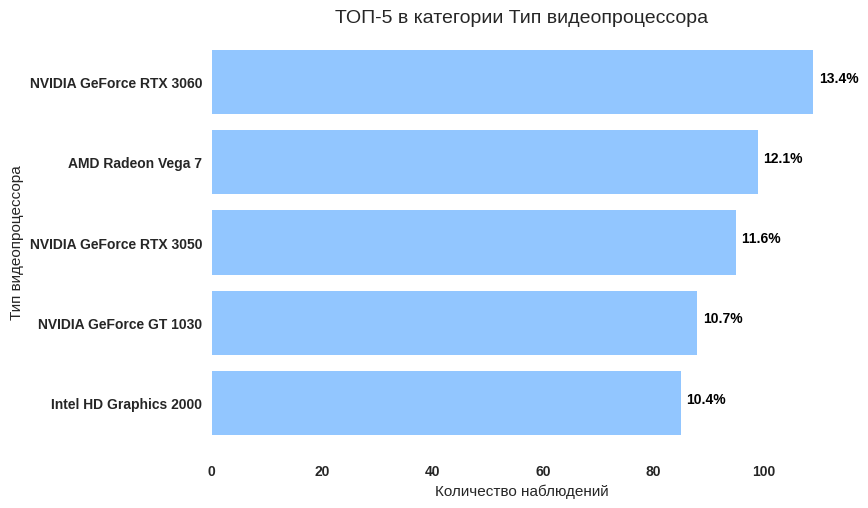

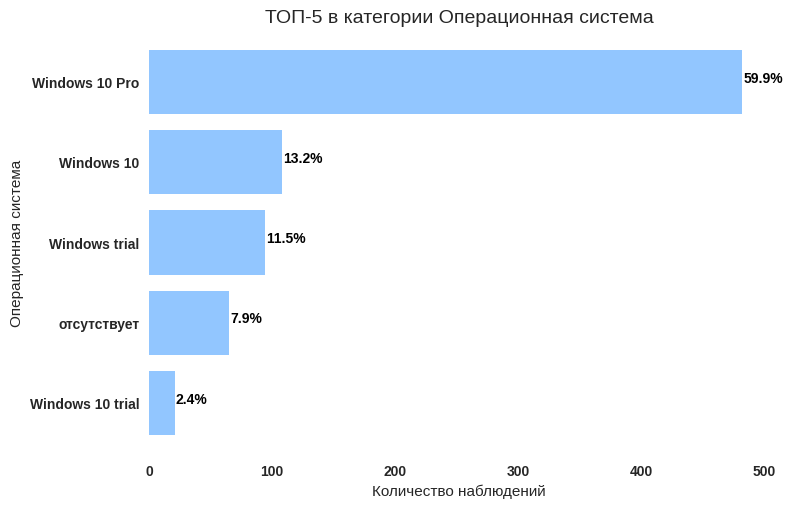

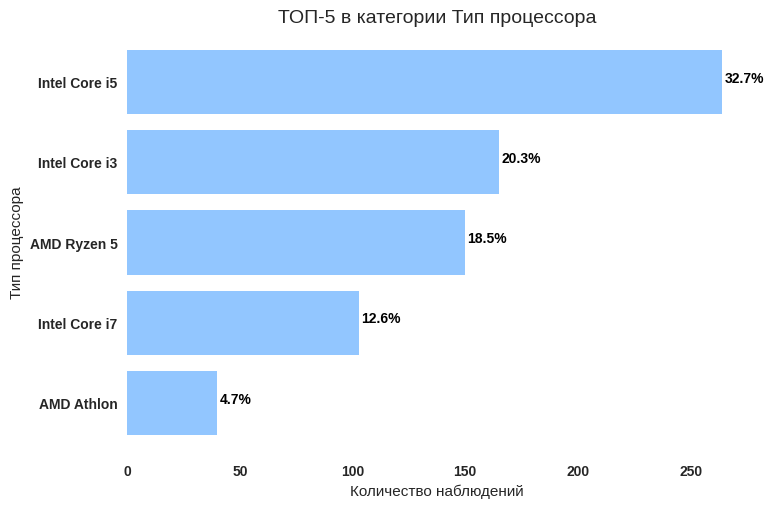

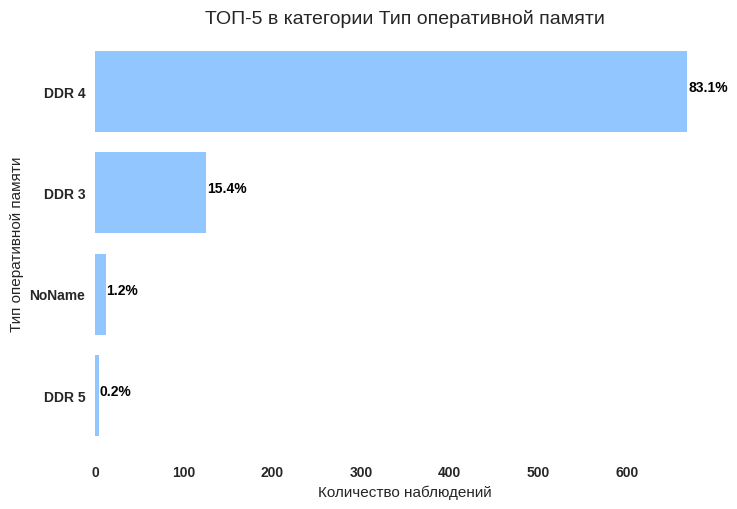

In [326]:
plt.style.use('seaborn-pastel')
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots()
for col in df_sales_types_obj:
  data = df_sales[col].value_counts().sort_values().iloc[-5:]
  draw_graph(data, df_sales[col].count())

  plt.xlabel("Количество наблюдений")
  plt.ylabel(russian_names_cols[col])
  plt.xticks(fontweight='bold')
  plt.yticks(fontweight='bold')

  plt.title('ТОП-5 в категории ' + russian_names_cols[col], fontsize = 14)
  # plt.savefig('top5_'+col+'.png',  bbox_inches='tight')
  plt.grid(visible=None)
  plt.show()
  print('\n\n')

**Описательные характеристики категориальных признаков**

In [327]:
df_sales[df_sales_types_obj].describe()

,video_proc,OS,proc_type,ram_type
count,801,801,801,801
unique,42,14,16,4
top,NVIDIA GeForce RTX 3060,Windows 10 Pro,Intel Core i5,DDR 4
freq,107,480,262,666


In [328]:
count = df_sales['sales'].count()
print("ТОП-5 комплектующих (категориальные признаки) в предложениях на рынке")
top5 = 0
def top5_shares_s(col, count):
  top5 = df_sales.groupby(col)['sales'].count().sort_values(ascending=False)[:5]

  items = pd.concat([pd.DataFrame(top5), pd.DataFrame([russian_names_cols[col] for x in range(len(top5.index))], index = top5.index).rename(columns={0:'Признак'}) ,
                     pd.DataFrame(round(top5 / count *100)).rename(columns={'sales':'% в продажах'})], axis=1)
  print('Количество продаж в категории:', russian_names_cols[col], ":")
  for i, row in items.iterrows():
    # print('---',i,'+++', row)
    # for k in row:
    # if int(row[2]) != '':
    print(i,'- доля ввыборке - ',int(row[2]),'%')
  return items.drop(columns=['sales'])

top5_sales_obj = pd.concat([top5_shares_s('video_proc', count),top5_shares_s('OS', count), \
                           top5_shares_s('proc_type', count),top5_shares_s('ram_type', count)])

ТОП-5 комплектующих (категориальные признаки) в предложениях на рынке
Количество продаж в категории: Тип видеопроцессора :
NVIDIA GeForce RTX 3060 - доля ввыборке -  13 %
AMD Radeon Vega 7 - доля ввыборке -  12 %
NVIDIA GeForce RTX 3050 - доля ввыборке -  12 %
NVIDIA GeForce GT 1030 - доля ввыборке -  11 %
Intel HD Graphics 2000 - доля ввыборке -  10 %
Количество продаж в категории: Операционная система :
Windows 10 Pro - доля ввыборке -  60 %
Windows 10 - доля ввыборке -  13 %
Windows trial - доля ввыборке -  11 %
отсутствует - доля ввыборке -  8 %
Windows 10 trial - доля ввыборке -  2 %
Количество продаж в категории: Тип процессора :
Intel Core i5 - доля ввыборке -  33 %
Intel Core i3 - доля ввыборке -  20 %
AMD Ryzen 5 - доля ввыборке -  18 %
Intel Core i7 - доля ввыборке -  13 %
AMD Athlon - доля ввыборке -  5 %
Количество продаж в категории: Тип оперативной памяти :
DDR 4 - доля ввыборке -  83 %
DDR 3 - доля ввыборке -  15 %
NoName - доля ввыборке -  1 %
DDR 5 - доля ввыборке -  0

Сделаем сравнительную таблицу ТОП5 комплектующих в Предложениях и в продажах

In [329]:
top5_price_obj = top5_price_obj.reset_index().rename(columns={'index':'Наименование'})
top5_sales_obj = top5_sales_obj.reset_index().rename(columns={'index':'Наименование'})
top5_obj = top5_sales_obj.merge(top5_price_obj, left_on=['Признак','Наименование'], right_on=['Признак', 'Наименование'])
top5_obj['% в продажах'] = top5_obj['% в продажах'].astype(int)
top5_obj['% в предложениях'] = top5_obj['% в предложениях'].astype(int)
top5_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Наименование      16 non-null     object
 1   Признак           16 non-null     object
 2   % в продажах      16 non-null     int64 
 3   % в предложениях  16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [330]:
top5_obj.sample(2)

,Наименование,Признак,% в продажах,% в предложениях
11,AMD Athlon,Тип процессора,5,4
8,Intel Core i3,Тип процессора,20,15


In [331]:
# изменим порядок столбцов для наглядности
top5_obj = top5_obj[['Признак', 'Наименование', '% в предложениях', '% в продажах']]
# объеденим таблицы
top5_obj.style.apply(highlight, col2highlite="% в продажах", axis=None)

,Признак,Наименование,% в предложениях,% в продажах
0,Тип видеопроцессора,NVIDIA GeForce RTX 3060,22,13
1,Тип видеопроцессора,AMD Radeon Vega 7,6,12
2,Тип видеопроцессора,NVIDIA GeForce RTX 3050,14,12
3,Операционная система,Windows 10 Pro,52,60
4,Операционная система,Windows 10,11,13
5,Операционная система,Windows trial,7,11
6,Операционная система,отсутствует,5,8
7,Тип процессора,Intel Core i5,37,33
8,Тип процессора,Intel Core i3,15,20
9,Тип процессора,AMD Ryzen 5,15,18


В некоторых случаях доля комплектующего в общей выборке в продажах превышает долю комплектующего в предложениях. Из это ко можно сделать вывод что рынок недонасыщен этим видом комплектущего и программного обеспечения. Заказчику следует обратить внимание на позиции выделенные голубым цветом.

In [332]:
# top5_obj[top5_obj.index.isin([1,3,4,5,6,8,9,11,13])]

**Анализ категориальных признаков - Вывод**

В некоторых случаях доля комплектующего в общей выборке в продажах превышает долю комплектующего в предложениях. Из это ко можно сделать вывод что рынок недонасыщен этим видом комплектущего и программного обеспечения.. Заказчику стоит обратить внимание такие позиции как:
* Видеопроцессор AMD Radeon Vega 7
* Операционные системы - Windows 10 Pro, Windows 10, Windows trial, без ОС
* Тип процессора - Intel Core i3, AMD Ryzen 5, AMD Athlon
* Тип оперативной памяти - DDR 3

##✔ *Анализ взаимосвязи числовых и ранговых признаков*

Для анализа взаимной корреляции числовых и ранговых признаков будем применять метод Спирмена

In [333]:
df_sales.corr(method='spearman')

,sales,price,feedbacks,seller_rating,proc_cores,ram,hdd_capacity,ssd_capacity,garant
sales,1.000000,-0.170523,0.646023,0.064941,-0.101802,-0.123133,-0.006860,-0.020527,0.150516
price,-0.170523,1.000000,-0.124127,0.396736,0.611012,0.570453,0.673394,0.558317,0.231141
feedbacks,0.646023,-0.124127,1.000000,0.132909,-0.038286,-0.007312,-0.070426,0.075249,0.180211
seller_rating,0.064941,0.396736,0.132909,1.000000,0.048046,0.262354,0.491413,0.358559,0.170120
proc_cores,-0.101802,0.611012,-0.038286,0.048046,1.000000,0.502678,0.517072,0.385627,0.006234
ram,-0.123133,0.570453,-0.007312,0.262354,0.502678,1.000000,0.529738,0.476085,0.280604
hdd_capacity,-0.006860,0.673394,-0.070426,0.491413,0.517072,0.529738,1.000000,0.234137,0.627118
ssd_capacity,-0.020527,0.558317,0.075249,0.358559,0.385627,0.476085,0.234137,1.000000,0.188408
garant,0.150516,0.231141,0.180211,0.170120,0.006234,0.280604,0.627118,0.188408,1.000000


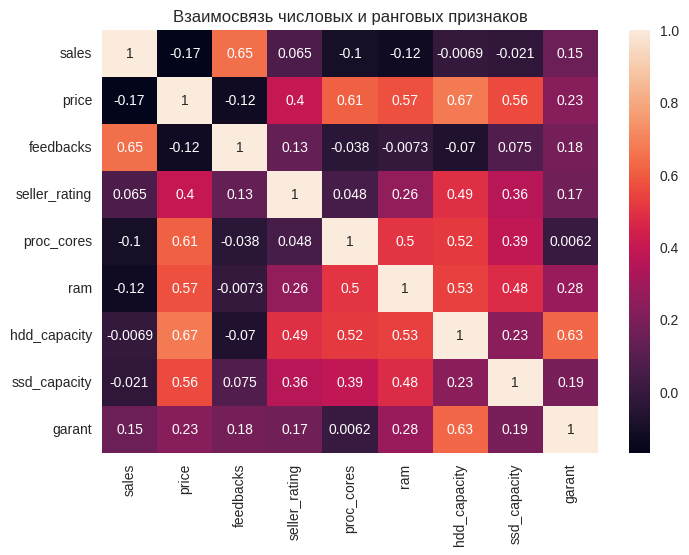

In [334]:
plt.title('Взаимосвязь числовых и ранговых признаков')
hm = sns.heatmap(df_sales.corr(method='spearman'), annot=True)

***Признак "Количество продаж"***

Самая высокая корреляция между Количеством продаж и Количеством отзывов. По другим числовым и ранговым признакам у целевой переменной "Количество продаж" отсутсвует какая-либо заметная корреляция.

Также наблюдается заметная корреляция между признаками
* "Обьем жесткого диска HDD" и  "Гарантийный срок", "Объем оперативной памяти", "Количество ядер процессора"
* "Объем оперативной памяти" и "Количество ядер процессора", "Обьем жесткого диска HDD"


Проверим значимость взаимных связей между признаком "Количество продаж" и другими числовыми и ранговыми признаками

**Корреляция Спирмена для признака Количество продаж**

**Гипотеза Н0: связь между признаками отсутствует или она равна 0**

In [335]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 4067
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sales             801 non-null    Int64  
 1   price             801 non-null    float64
 2   sales_group       801 non-null    object 
 3   feedbacks         526 non-null    Int64  
 4   seller_rating     749 non-null    float64
 5   video_proc        801 non-null    object 
 6   OS                801 non-null    object 
 7   proc_type         801 non-null    object 
 8   proc_cores        801 non-null    int64  
 9   ram_type          801 non-null    object 
 10  ram               801 non-null    int64  
 11  hdd_capacity      214 non-null    Int64  
 12  ssd_capacity      767 non-null    Int64  
 13  garant            729 non-null    Float64
 14  video_proc_group  801 non-null    object 
 15  proc_type_group   801 non-null    object 
 16  OS_group          801 non-null    object 
d

In [336]:
for col in ['price','feedbacks',	'seller_rating', 'proc_cores', 'ram',	'hdd_capacity',	'ssd_capacity',	'garant']:
  print('Количество продаж /', col,'--->', scipy.stats.spearmanr(df_sales[df_sales[col].notna()]['sales'], df_sales[col].dropna()))

Количество продаж / price ---> SignificanceResult(statistic=-0.17052295848401675, pvalue=1.2088000767237865e-06)
Количество продаж / feedbacks ---> SignificanceResult(statistic=0.6460225368603025, pvalue=1.855489270431671e-63)
Количество продаж / seller_rating ---> SignificanceResult(statistic=0.06494073226966894, pvalue=0.07570062157639165)
Количество продаж / proc_cores ---> SignificanceResult(statistic=-0.10180180293319423, pvalue=0.003924274770983206)
Количество продаж / ram ---> SignificanceResult(statistic=-0.12313282525296823, pvalue=0.0004780641556835359)
Количество продаж / hdd_capacity ---> SignificanceResult(statistic=-0.006859664285231483, pvalue=0.9205335291079555)
Количество продаж / ssd_capacity ---> SignificanceResult(statistic=-0.020527235508884616, pvalue=0.5702865176447729)
Количество продаж / garant ---> SignificanceResult(statistic=0.15051596429813788, pvalue=4.4992347370034205e-05)


***Вывод по Корреляции Спирмена***
С признаком "Количество продаж" имеют статистически значимую связь следующие признаки (в порядке убывания p-value):
* Количество отзывов
* Цена
* Гарантийный срок
* Объем оперативной памяти
* Количество ядер процессора


Признаки "Рейтинг продавца", "Объем жеского диска HHD" и "Объем жеского диска SSD" не имеют статистически значимой связи с признаком "Количество продаж". Для этих признаков неот основания отклонить нулевую гипотезу

**Анализ взаимосвязи числовых и ранговых признаков - Вывод**

***Признак "Количество продаж"***

Самая высокая корреляция между Количеством продаж и Количеством отзывов. По другим числовым и ранговым признакам у целевой переменной "Количество продаж" отсутсвует какая-либо заметная корреляция.

Также наблюдается заметная корреляция между признаками
* "Обьем жесткого диска HDD" и  "Гарантийный срок", "Объем оперативной памяти", "Количество ядер процессора"
* "Объем оперативной памяти" и "Количество ядер процессора", "Обьем жесткого диска HDD"

С признаком "Количество продаж" имеют статистически значимую связь следующие признаки (в порядке убывания p-value):
* Количество отзывов
* Цена
* Гарантийный срок
* Объем оперативной памяти
* Количество ядер процессора

Признаки "Рейтинг продавца", "Объем жеского диска HHD" и "Объем жеского диска SSD" не имеют статистически значимой связи с признаком "Количество продаж". Для этих признаков неот основания отклонить нулевую гипотезу



##✔ *Анализ взаимосвязи категориальных признаков*

In [337]:
df_sales['sales'].unique()

<IntegerArray>
[400, 10, 200, 40, 5, 30, 20, 50, 500, 100, 80, 800, 90, 300, 70, 60]
Length: 16, dtype: Int64

Т.к. количественный признак "Количество продаж" является дискретным с малым набором значений, то провести анализ взаимосвязи количественных и категориальных признаков не представляется возможным, т.е. независимая переменная в тесте, Краскала-Уолиса, например, должна быть либо непрерывной, либо ранговой.. Рассмотрим укрупненный показатель "Количество продаж" как категориальный признак.

In [338]:
df_sales.columns

Index(['sales', 'price', 'sales_group', 'feedbacks', 'seller_rating',
       'video_proc', 'OS', 'proc_type', 'proc_cores', 'ram_type', 'ram',
       'hdd_capacity', 'ssd_capacity', 'garant', 'video_proc_group',
       'proc_type_group', 'OS_group'],
      dtype='object')

Выясним какое минимальное количество частот в кросстаблицах по каждому признаку

In [339]:
l = []
item = 'sales_group'
for cross_item in ['video_proc','OS','proc_type','ram_type'] :
  l.append(item)
  if (cross_item not in l):
    ll=[]
    wd = pd.crosstab(df_sales[item].dropna(), df_sales[cross_item].dropna())
    for col in wd.columns:
      ll.append(wd[col].min())

    print(item,'-',cross_item,ll)

sales_group - video_proc [0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sales_group - OS [0, 0, 1, 0, 0, 16, 0, 0, 0, 0, 0, 0, 5, 3]
sales_group - proc_type [1, 2, 0, 0, 0, 6, 0, 0, 0, 0, 3, 9, 2, 0, 0, 1]
sales_group - ram_type [4, 26, 0, 0]


У нас имеется 4 пары категориальных признаков  и не по одной из них мы не можем применить Критерий Х2. Проверим укрупненые группировки

In [340]:
l = []
item = 'sales_group'
for cross_item in ['video_proc_group','proc_type_group', 'OS_group'] :
  l.append(item)
  if (cross_item not in l):
    ll=[]
    wd = pd.crosstab(df_sales[item].dropna(), df_sales[cross_item].dropna())
    for col in wd.columns:
      ll.append(wd[col].min())

    print(item,'-',cross_item,ll)

sales_group - video_proc_group [7, 3, 14, 0]
sales_group - proc_type_group [9, 17]
sales_group - OS_group [19, 0, 9]


 По групповым признакам мы можем применить критерий ХИ2 только к паре sales_group - proc_type_group, т.к. у признаков присутствуют частоты меньше 5..Сделаем это.

In [341]:
WF=pd.crosstab(df_price['sales_group'],df_price['proc_type_group']); WF

proc_type_group,AMD,Intel
sales_group,,
10,32,57
100 и более,15,17
20,9,30
30 - 90,19,36
5,155,431


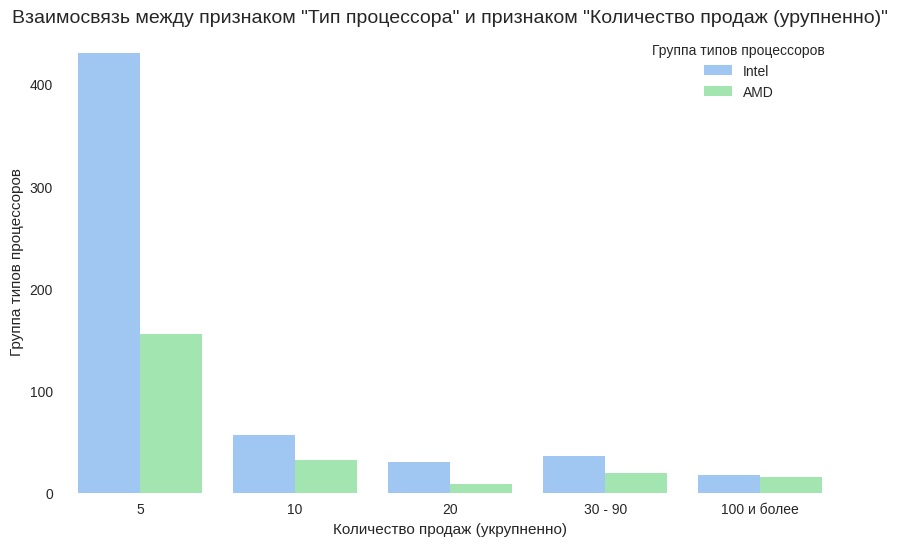

In [342]:
f, ax = plt.subplots(figsize=(10, 6))
plt.title('Взаимосвязь между признаком "Тип процессора" и признаком "Количество продаж (урупненно)"',  fontsize = 14)
ax = sns.countplot(x=df_price['sales_group'], hue=df_price['proc_type_group'], order=order)
ax.set(xlabel='Количество продаж (укрупненно)', ylabel='Группа типов процессоров')
ax.legend(title='Группа типов процессоров')
plt.show()

Применим **Тест X2  -> Гипотеза H0** : Две переменные независимы.

In [343]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 10.421919794561926
degrees of freedom: 4
p-value: 0.03388969000665713



Вывод по **Тесту X2** для пары признаков ***proc_type_group - sales_group***:

При проведении теста Х2 - p-Value меньше уровня значимости 0,05. Поэтому, отклоняем нулевую гипотезу и делаем вывод о том, что между двумя переменными существует статистически значимая взаимосвязь.

In [344]:
# Процедура "тестирования перебором" точным тестом Фишера значений фрагментов 2х2 категориальных переменных
# Если по какому-либо фрагменту p-value превысит значение 0,05 - будем выводит сообщение
# Если не превысит - ничего не будем выводить
def fisher_test(df1, df2):
  ct = pd.crosstab(df1, df2)
  ft = 0
  for i, k in enumerate(ct.columns[:-1]):
    print
    for ii, kk in enumerate(ct.index[:-1]):
      ft = stats.fisher_exact(ct.iloc[ii:ii+2, i:i+2])
      if ft[1] < 0.05:
        print(k,'/',kk,'===>', ft[1])

Применим для оставшихся пар **точный тест Фишера -> Гипотеза H0** : Две переменные независимы.

In [345]:
fisher_test(df_sales.video_proc.dropna(), df_sales.sales_group)

30 - 90 / Intel HD Graphics ===> 0.006908115358819585


Вывод по **Тесту Фишера** для пары признаков ***video_proc - sales***:

При применении точного теста Фишера методом перебора значений фрагментов 2х2 категориальных признаков в 1 случае p-Value не превысило 0,05. Поэтому, в целом для всей совокупности мы отклоняем нулевую гипотезу и делаем вывод о том, что различия между двумя переменными являются статистически значимыми

In [346]:
fisher_test(df_sales.OS.dropna(), df_sales.sales_group)

30 - 90 / Windows trial ===> 0.02934164731323277


Вывод по **Тесту Фишера** для пары признаков ***OS - sales***:

При применении точного теста Фишера методом перебора значений  фрагментов 2х2 категориальных признаков в 1 случауе p-Value не превысило 0,05. Поэтому, в целом для всей совокупности мы отклоняем нулевую гипотезу и делаем вывод о том, что два признака взаимозависимы

In [347]:
fisher_test(df_sales.ram_type.dropna(), df_sales.sales_group)

Вывод по **Тесту Фишера** для пары признаков ***ram_type - sales***:

При применении точного теста Фишера методом перебора значений  фрагментов 2х2 категориальных признаков ни в одном случаe p-Value не превысило 0,05. Поэтому, у нас нет оснований отклонить нулевую гипотезу и мы делаем вывод о том, что два признака НЕ являются взаимозависимыми

**Анализ взаимосвязи категориальных признаков - Вывод**

Из проведенного анализа взаимосвязей между признаком "Количество продаж" и другими категоральными признаками можно сделать вывод, что:

**Количество продаж не зависит от :** Тип оперативной памяти

**Количество продаж зависит от :**
* Тип Видеопроцессора
* Тип процессора
* Операционная система


##✔ *Анализ взаимосвязи числовых и категориальных признаков*

Т.к. Количественный признак "Количество продаж" является дискретным с малым набором значений, то провести анализ взаимосвязи количественных и категориальных признаков не представляется возможным, т.е. независимая переменная в тесте, Краскала-Уолиса должна быть лимбо непрерывной, либо ранговой.. Поэтому была создана категориальная переменная "Количество продаж" и прланализированы её взаимосвязи с другими категориальными переменными в разеле "Анализ категориальных данных"

##✔ ТОП-5 самых популярных конфигураций компьютеров по продажам

In [348]:
pd.set_option('colheader_justify', 'left')
cols = ['video_proc','proc_type','proc_cores','ram_type','ram', 'hdd_capacity', 'ssd_capacity']
comps = df_sales[cols].value_counts().sort_values(ascending=False).reset_index()
cols = [russian_names_cols[x] for x in cols]
cols.append("Количество наблюдений")
comps.columns = cols
comps[:5]

,Тип видеопроцессора,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти,Объем жесткого диска HDD,Объем жесткого диска SSD,Количество наблюдений
0,AMD Radeon Vega 7,AMD Ryzen 5,6,DDR 4,32,1000,500,11
1,NVIDIA GeForce RTX 3050,Intel Core i5,6,DDR 4,16,1000,500,7
2,NVIDIA GeForce GTX 1660,Intel Core i3,4,DDR 4,16,500,500,7
3,NVIDIA GeForce RTX 3060,Intel Core i7,12,DDR 4,16,1000,500,7
4,AMD Radeon Vega 7,AMD Ryzen 5,6,DDR 4,64,1000,500,7


## ✔ Сравнение топовых комплектующих в Предложениях и в Продажах

In [349]:
for i in top5_num['Признак'].unique():
  print(i)
  top5_outputs = top5_num[top5_num['Признак']==i][['Количество / Объем', '% в предложениях', '% в продажах']]
  display(top5_outputs.style.apply(highlight, col2highlite="% в продажах", axis=None))

for i in top5_obj['Признак'].unique():
  print(i)
  top5_outputs = top5_obj[top5_obj['Признак']==i][['Наименование','% в предложениях', '% в продажах']]
  display(top5_outputs.style.apply(highlight, col2highlite="% в продажах", axis=None))

Количество ядер процессора


,Количество / Объем,% в предложениях,% в продажах
0,6,46,42
1,4,22,29
2,2,5,11
3,8,12,6
4,12,8,5


Объем оперативной памяти


,Количество / Объем,% в предложениях,% в продажах
5,16,61,53
6,8,14,21
7,32,20,20
8,4,3,4
9,64,2,2


Объем жесткого диска HDD


,Количество / Объем,% в предложениях,% в продажах
10,1000,29,18
11,500,3,6
12,2000,1,2


Объем жесткого диска SSD


,Количество / Объем,% в предложениях,% в продажах
13,500,44,53
14,250,18,20
15,1000,27,14
16,120,5,7
17,2000,1,1


Тип видеопроцессора


,Наименование,% в предложениях,% в продажах
0,NVIDIA GeForce RTX 3060,22,13
1,AMD Radeon Vega 7,6,12
2,NVIDIA GeForce RTX 3050,14,12


Операционная система


,Наименование,% в предложениях,% в продажах
3,Windows 10 Pro,52,60
4,Windows 10,11,13
5,Windows trial,7,11
6,отсутствует,5,8


Тип процессора


,Наименование,% в предложениях,% в продажах
7,Intel Core i5,37,33
8,Intel Core i3,15,20
9,AMD Ryzen 5,15,18
10,Intel Core i7,21,13
11,AMD Athlon,4,5


Тип оперативной памяти


,Наименование,% в предложениях,% в продажах
12,DDR 4,88,83
13,DDR 3,9,15
14,NoName,2,1
15,DDR 5,0,0


В некоторых случаях доля комплектующего в общей выборке в продажах превышает долю комплектующего в предложениях. Из этого можно сделать вывод что рынок недонасыщен этим видом комплектущего.. Заказчику стоит обратить внимание такие позиции как:

* Количество ядер процессора    4, 2 гб
*   Объем оперативной памяти    8, 4 гб
* Объем жесткого диска HDD  500, 2000 гб
* Объем жесткого диска SSD  500, 250, 120 гб

* Видеопроцессор AMD Radeon Vega 7
* Операционные системы - Windows 10 Pro, Windows 10, Windows trial, без ОС
* Тип процессора - Intel Core i3, AMD Ryzen 5, AMD Athlon
* Тип оперативной памяти - DDR 3

##⚛ Выводы по разведочному анализу и статистическому анализу

Для анализа были выбраны следующие признаки:

***Количественные***
* ***price*** - цена
* ***sales*** - количество проданных компьютеров
* ***feedbacks*** - количество отзывов
* ***proc_cores*** - количество ядер процессора
* ***ram*** - объем оперативной памяти
* ***hdd_capacity*** -  объем HDD
* ***ssd_capacity*** -  объем SSD

***Ранговые (порядковые)***
* ***seller_rating***-  рейтинг продавца
* ***garant*** - Гарантийный срок

***Категориальные***
* ***proc_type*** - тип процессора
* ***ram_type*** - тип опреативной памяти
* ***video_proc*** - Видеопроцессор
* ***OS*** - Операционная система




Были рассмотрены 2 датасета:
  * df_price - датасет для анализа взаимосвязи показателй с целевой переменной "Цена". Данные очищены от позиций с нереальными ценами на компютеры (менее 10 тыс.руб), а также позиций, которые включают в себя стоимость мониторов (соответствующая часть названия)
  * df_sales - датасет для анализа взаимосвязей показателей с целевой переменной "Продажи". Включены только наблюдения у котороых признак продажи не равен нулю. Данные очищены от позиций с нереальными ценами на компютеры (менее 10 тыс.руб)

## **- Цена**

**Анализ числовых и ранговых признаков - Вывод**

* Цена на компьютеры на компьютеры в представленной выборке изменяется от 10541р до 235900р. Половина наблюдений лежат ниже 66737р. 75% наблюдений меньше 84392р. Средняя цена - 67582р.90% значений меньше или равны 109680р

* Количество ядер процессора в представленной выборке изменяются от 2 до 24. Половина наблюдений равно 6. 75% наблюдений меньше или равно 8.90% значений меньше или равны 12.

* Количество оперативной памяти в представленной выборке изменяются от 4 до 64. Половина наблюдений равно 16. 75% наблюдений меньше или равно 16.90% значений меньше или равны 32Гб.

* Жесткий диск HDD в представленной выборке изменяются от 500 до 3000Гб. Половина наблюдений равно 1000. 75% наблюдений меньше или равно 1000. 90% значений меньше или равны 1000.

* Жесткий диск SSD в представленной выборке изменяются от 60 до 2000Гб. Половина наблюдений равно 500. 75% наблюдений меньше или равно 1000. 90% значений меньше или равны 1000.

* Гарантийный срок  в представленной выборке изменяются от 14 дней до 3 лет. 50% наблюдений меньше или равно 3 годам.

Гистограмма Цены показала, что выборка не являетс янормально распределенной, однако два коэффициента ассиметрии и эксцесса дают противоречивые результаты . C помощью критерия Шапиро-Уилка было доказано, что распределение этого признака не является номальным

Столбчатые диаграммы показывают, что самым полулярным значением у следующих признаков является:
* Количество ядер процессора - 6
* Объем оперативной памяти - 16
* Объем жесткого диска HDD -1000
* Объем жесткого диска SSD - 500
* Гарантийный срок - 3 года

В большенстве своем топовое значение превышает остальные по своему количеству в разы.

ТОП-5 комплектующих (числовые признаки) в предложениях на рынке

Количество продаж в категории: Количество ядер процессора :
* 6 - доля ввыборке -  46 %
* 8 - доля ввыборке -  22 %
* 4 - доля ввыборке -  12 %
* 12 - доля ввыборке -  8 %
* 10 - доля ввыборке -  5 %

Количество продаж в категории: Объем оперативной памяти :
* 16 - доля ввыборке -  61 %
* 32 - доля ввыборке -  20 %
* 8 - доля ввыборке -  14 %
* 64 - доля ввыборке -  3 %
* 4 - доля ввыборке -  2 %

Количество продаж в категории: Объем жесткого диска HDD :
* 1000 - доля ввыборке -  29 %
* 2000 - доля ввыборке -  3 %
* 500 - доля ввыборке -  1 %

Количество продаж в категории: Объем жесткого диска SSD :
* 500 - доля ввыборке -  44 %
* 1000 - доля ввыборке -  27 %
* 250 - доля ввыборке -  18 %
* 120 - доля ввыборке -  5 %
* 2000 - доля ввыборке -  1 %

**Анализ категориальных признаков - Вывод**
Самыми популярными значениями для :
 *  Тип видеопроцессора являются:
    -  NVIDIA GeForce RTX 3060 (21.9% выборки)
    -  NVIDIA GeForce RTX 3050 (13.6% выборки)
    -  NVIDIA GeForce GTX 1650 (9.7% выборки)
    -  NVIDIA GeForce GTX 1660 (8.2% выборки)
    -  AMD Radeon Vega 7 (6.3% выборки)
 *  Операционная система являются:
    -  Windows 10 Pro (51.5% выборки)
    -  Windows 11 Pro (18.6% выборки)
    -  Windows 10 (11.5% выборки)
    -  Windows trial (6.5% выборки)
    -  отсутствует (5.3% выборки)
 *  Тип процессора являются:
    -  Intel Core i5 (36.6% выборки)
    -  Intel Core i7 (20.7% выборки)
    -  Intel Core i3 (14.9% выборки)
    -  AMD Ryzen 5 (14.7% выборки)
    -  AMD Athlon (3.6% выборки)
 *  Тип оперативной памяти являются:
    -  DDR 4 (88.2% выборки)
    -  DDR 3 (9.0% выборки)
    -  NoName (2.4% выборки)
    -  DDR 5 (0.4% выборки)

**Анализ взаимосвязи числовых и ранговых признаков - Вывод**

***Признак "Цена"***

Проведенный статистический тест показал что все числовые и ранговые (количество ядер процессора, объем оперативной памяти,	объем жесткого hdd диска,	объем жеского ssdдиска,	гарантийный срок) признаки имеют статистически значимую связь с признаком "Цена".

Наболее сильная связь у цены с количеством ядер компьютера, объемом SSD-диска и объемом опреативной памяти.


**Анализ взаимосвязи числовых и категориальных признаков - Вывод**

Проведенный анализ показателей (Тип оперативной памяти, Группы видеопроцессоров, Группы Операционных систем, Группы Процессоров, диапазонов количества продаж) показал, что все категориальные признаки имеют статистически значимое влияние на Цену компьютера.

В большей степени Цена зависит от Типа видеопроцессора и типа оперативной памяти.

Рейтинг степени влияния на целевую переменную "Цена" может выглядеть так:
1. Тип видеопроцессора
2. Тип оперативной памяти
3. Операционная система
4. Тип процессора
5. Количество продаж


## **- Продажи**

**Анализ числовых признаков и ранговых - Вывод**

Количество продаж компьютеров представленной выборке изменяется от 5 до 800. Половина наблюдений лежат ниже 5. 75% наблюдений меньше или равно 10. 90% наблюдений лежат ниже 30.

Цена продаж компьютеров представленной выборке изменяется от 10805 до 214954. Половина наблюдений лежат ниже 44989. 75% наблюдений меньше или равно 74872.90% наблюдений лежат ниже 107521р.

Количество отзывов представленной выборке изменяется от 1 до 296. Половина наблюдений лежат ниже 3. 75% наблюдений меньше или равно 9. 90% наблюдений лежат ниже 44.

Рейтинг продавца в представленной выборке изменяется от 0 до 8. 75% наблюдений меньше 4,7. И лишь четверть оценок являются высокими от 4,7 до 5 баллов. 90% наблюдений лежат ниже 4,8.

Количество ядер процессора в представленной выборке изменяются от 2 до 24. 75% наблюдений меньше или равно 6. 90% наблюдений лежат ниже 10.

Количество оперативной памяти в представленной выборке изменяются от 4 до 64. 75% наблюдений меньше или равно 16. 90% наблюдений лежат ниже 32гб.

Жесткий диск HDD в представленной выборке изменяются от 500 до 2000Гб. 75% наблюдений меньше или равно 1000. 90% наблюдений лежат ниже 1000гб.

Жесткий диск SSD в представленной выборке изменяются от 120 до 2000Гб. 75% наблюдений меньше или равно 500. 90% наблюдений лежат ниже 1000гб.

Гарантийный срок в представленной выборке изменяются от 14 дней до 3 лет. 50% наблюдений равно 3 годам. 90% наблюдений лежат ниже 3 лет

Столбчатые диаграммы показывают, что самым полулярным значением у следующих признаков является:
* Количество продаж - 5
* Количество отзывов - 1
* Количество баллов рейтинга продавца - 4,7
* Количество ядер процессора - 6
* Объем оперативной памяти - 16
* Объем жесткого диска HDD -1000
* Объем жесткого диска SSD - 500
* Гарантийный срок - 3 года

В большинстве своем топовое значение превышает остальные по своему количеству в разы.


ТОП-5 комплектующих (числовые признаки) в предложениях на рынке

Количество продаж в категории: Количество ядер процессора :
* 6 - доля ввыборке -  42 %
* 4 - доля ввыборке -  29 %
* 2 - доля ввыборке -  11 %
* 8 - доля ввыборке -  6 %
* 12 - доля ввыборке -  5 %

Количество продаж в категории: Объем оперативной памяти :
* 16 - доля ввыборке -  53 %
* 8 - доля ввыборке -  21 %
* 32 - доля ввыборке -  20 %
* 4 - доля ввыборке -  4 %
* 64 - доля ввыборке -  2 %

Количество продаж в категории: Объем жесткого диска HDD :
* 1000 - доля ввыборке -  18 %
* 500 - доля ввыборке -  6 %
* 2000 - доля ввыборке -  2 %

Количество продаж в категории: Объем жесткого диска SSD :
* 500 - доля ввыборке -  53 %
* 250 - доля ввыборке -  20 %
* 1000 - доля ввыборке -  14 %
* 120 - доля ввыборке -  7 %
* 2000 - доля ввыборке -  1 %

**Анализ категориальных признаков - Вывод**

ТОП-5 комплектующих (категориальные признаки) в предложениях на рынке

Количество продаж в категории: Тип видеопроцессора :
* NVIDIA GeForce RTX 3060 - доля ввыборке -  13 %
* AMD Radeon Vega 7 - доля ввыборке -  12 %
* NVIDIA GeForce RTX 3050 - доля ввыборке -  12 %
* NVIDIA GeForce GT 1030 - доля ввыборке -  11 %
* Intel HD Graphics 2000 - доля ввыборке -  10 %

Количество продаж в категории: Операционная система :
* Windows 10 Pro - доля ввыборке -  60 %
* Windows 10 - доля ввыборке -  13 %
* Windows trial - доля ввыборке -  11 %
* отсутствует - доля ввыборке -  8 %
* Windows 10 trial - доля ввыборке -  2 %

Количество продаж в категории: Тип процессора :
* Intel Core i5 - доля ввыборке -  33 %
* Intel Core i3 - доля ввыборке -  20 %
* AMD Ryzen 5 - доля ввыборке -  18 %
* Intel Core i7 - доля ввыборке -  13 %
* AMD Athlon - доля ввыборке -  5 %

Количество продаж в категории: Тип оперативной памяти :
* DDR 4 - доля ввыборке -  83 %
* DDR 3 - доля ввыборке -  15 %
* NoName - доля ввыборке -  1 %

**Анализ взаимосвязи числовых и ранговых признаков - Вывод**

***Признак "Количество продаж"***

Самая высокая корреляция между Количеством продаж и Количеством отзывов. По другим числовым и ранговым признакам у целевой переменной "Количество продаж" отсутсвует какая-либо заметная корреляция.

Также наблюдается заметная корреляция между признаками
* "Обьем жесткого диска HDD" и  "Гарантийный срок", "Объем оперативной памяти", "Количество ядер процессора"
* "Объем оперативной памяти" и "Количество ядер процессора", "Обьем жесткого диска HDD"

С признаком "Количество продаж" имеют статистически значимую связь следующие признаки (в порядке убывания p-value):
* Количество отзывов
* Цена
* Гарантийный срок
* Количество ядер процессора
* Объем оперативной памяти

Признаки "Рейтинг продавца", "Объем жеского диска HHD" и "Объем жеского диска SSD" не имеют статистически значимой связи с признаком "Количество продаж". Для этих признаков неот основания отклонить нулевую гипотезу



В некоторых случаях доля комплектующего в общей выборке в продажах превышает долю комплектующего в предложениях. Из этого можно сделать вывод что рынок недонасыщен этим видом комплектущего.. Заказчику стоит обратить внимание такие позиции как:

* Количество ядер процессора    4, 2 гб
*   Объем оперативной памяти    8, 4 гб
* Объем жесткого диска HDD  500, 2000 гб
* Объем жесткого диска SSD  500, 250, 120 гб

* Видеопроцессор AMD Radeon Vega 7
* Операционные системы - Windows 10 Pro, Windows 10, Windows trial, без ОС
* Тип процессора - Intel Core i3, AMD Ryzen 5, AMD Athlon
* Тип оперативной памяти - DDR 3

**Анализ взаимосвязи категориальных признаков - Вывод**

Из проведенного анализа взаимосвязей между категоральными признаками можно сделать вывод, что:

**Количество продаж не зависит от :** Тип оперативной памяти

**Количество продаж зависит от :**
* Тип Видеопроцессора
* Тип процессора
* Операционная система

# ▶ Выводы и рекомендации (evaluation)

##✔ О популярности, выраженной в количестве продаж, и ее зависимости от комплектующих

Количество продаж компьютеров представленной выборке изменяется от 5 до 800. Половина наблюдений равно 5. 90% наблюдений меньше или равны 30.

Самое популярное количество продаж - 5

Самая высокая корреляция между Количеством продаж и Количеством отзывов.

С признаком "Количество продаж" имеют статистически значимую связь следующие признаки:
* Количество отзывов
* Цена
* Гарантийный срок
* Количество ядер процессора
* Объем оперативной памяти
* Тип Видеопроцессора
* Тип процессора
* Операционные системы

Цена имеет небольшую, но статистически значимую отрицательную связь с Количеством продаж. Чем меньше Цена, тем больше количество продаж, что соответствует объективным законам рынка.

Не влияют на Количество продаж "Рейтинг продавца", "Объем жеского диска HHD" и "Объем жеского диска SSD", Тип оперативной памяти

##✔ О наиболее популярных комплектующих, продаваемых в составе компьютеров

Самым полулярным значением у следующих комплектующих является:
* Количество ядер процессора - 6
* Объем оперативной памяти - 16
* Объем жесткого диска HDD -1000
* Объем жесткого диска SSD - 500

В большинстве своем топовое значение превышает остальные по своему количеству в разы.

<table>
<caption><big><big><strong>Самые популярные значения типов комплектующих</big></big></caption>
<thead>
<tr><th>Видеопроцессор</th><th>Тип процессора</th><th>Количество ядер процессора
</th><th>Тип оперативной памяти</th><th>Объем оперативной памяти,Гб</th><th>
Объем диска HDD,Гб</th><th>Объем SSD,Гб</th></thead>
<tbody>
<tr align=center>
<td>NVIDIA GeForce RTX 3060 (13.4%)</td><td>Intel Core i5 (32.7%)</td><td>
6 (42%)</td><td>DDR 4 (83.1%)</td><td>16 (53%)</td><td>1000 (18%)</td><td>
500 (53%)</td></tr>
<tr align=center>
<td>AMD Radeon Vega 7 (12.1%)</td><td>Intel Core i3 (20.3%)</td><td>4 (29%)
</td><td>DDR 3 (15.4%)</td><td>8 (21%)</td><td>500 (6%)</td><td>250 (20%)</td></tr>
<tr align=center>
<td>NVIDIA GeForce RTX 3050 (11.6%)</td><td>AMD Ryzen 5 (18.5%)</td><td>2 (11%)</td><td>NoName (1.2%)</td><td>32 (20%)</td><td>2000 (2%)</td><td>1000 (14%)</td></tr>
<tr align=center>
<td>NVIDIA GeForce GT 1030 (10.7%)</td><td>Intel Core i7 (12.6%)</td><td>
8 (6%)</td><td></td><td>4 (4%)</td><td></td><td>120 (7%)</td></tr>
<tr align=center>
<td>Intel HD Graphics 2000 (10.4%)</td><td>AMD Athlon (4.7%)</td><td>12 (5%)</td><td></td><td>64 (2%)</td><td></td><td>2000 (1%)</td></tr>
</tbody>
</table>
<br>

Самая популярная Операционная система -  Windows 10 Pro (59.9% выборки)

Самый популярный Гарантийный срок - 3 года

ТОП-5 самых популярных конфигураций компьютеров по продажам

In [350]:
comps[:5]

,Тип видеопроцессора,Тип процессора,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти,Объем жесткого диска HDD,Объем жесткого диска SSD,Количество наблюдений
0,AMD Radeon Vega 7,AMD Ryzen 5,6,DDR 4,32,1000,500,11
1,NVIDIA GeForce RTX 3050,Intel Core i5,6,DDR 4,16,1000,500,7
2,NVIDIA GeForce GTX 1660,Intel Core i3,4,DDR 4,16,500,500,7
3,NVIDIA GeForce RTX 3060,Intel Core i7,12,DDR 4,16,1000,500,7
4,AMD Radeon Vega 7,AMD Ryzen 5,6,DDR 4,64,1000,500,7


##✔ О цене на компьютеры и ее зависимости от комплектующих, о ценовой вилке

Цена на компьютеры на компьютеры в представленной выборке изменяется от 10541р до 235900р. Половина наблюдений лежат ниже 66737р. 75% наблюдений меньше 84392р. Средняя цена - 67582р.90% значений меньше или равны 109680р


Проведенный статистический анализ числовых признаков показал что имеют статистически значимую связь с признаком "Цена" следующие признаки:
* количество ядер процессора,
* объем оперативной памяти,
* объем жесткого hdd диска,
* объем жеского ssd диска,
* гарантийный срок

Наболее сильная связь у цены с количеством ядер компьютера, объемом SSD-диска и объемом опреативной памяти.



Проведенный анализ категориальных показателей (Тип оперативной памяти, Группы видеопроцессоров, Группы Операционных систем, Группы Процессоров, диапазонов количества продаж) показал, что все категориальные признаки имеют статистически значимое влияние на Цену компьютера.

В большей степени Цена зависит от Типа видеопроцессора и типа оперативной памяти.

Рейтинг степени влияния на целевую переменную "Цена" может выглядеть так:
1. Тип видеопроцессора
2. Тип оперативной памяти
3. Операционная система
4. Тип процессора
5. Количество продаж

<table>
<caption><big><big><strong>Сравнение ценовой вилки компьютеров между предложениями и продажами (руб.)</big></big></caption>
<thead><tr>
<th>Статистика</th><th>Цена в предложениях</th><th>Цена в продажах</th>
</tr>
<tr>
</tr></thead>
<tbody>
<tr align=center><td>Минимальное значение</td><td>10541</td><td>10805</td></tr>
<tr align=center><td>Максимальное значение</td><td>235900</td><td>214954</td></tr>
<tr align=center><td>Среднее значение</td><td>67581</td><td>57093</td></tr>
<tr align=center><td>Медианное значение</td><td>66737</td><td>44989</td></tr>
<tr align=center><td>75% наблюдений лежат ниже</td><td>84392</td><td>74872</td></tr>
<tr align=center><td>90% наблюдений лежат ниже</td><td>109680</td><td>107521</td></tr>
</tbody>
</table>
<br>


Из приведенной таблицы видно, что Цена в продажах падает почти по всем статистическим показателям, что, возможно, можно объянить отрицательной корреляцией этих двух признаков

##✔ Рекомендации заказчику

В некоторых случаях доля комплектующего в общей выборке в продажах превышает долю комплектующего в предложениях. Из этого можно сделать вывод что рынок недонасыщен этим видом комплектущего.. Заказчику стоит обратить внимание такие позиции как:

* Количество ядер процессора    4, 2 гб
*   Объем оперативной памяти    8, 4 гб
* Объем жесткого диска HDD  500, 2000 гб
* Объем жесткого диска SSD  500, 250, 120 гб

* Видеопроцессор AMD Radeon Vega 7
* Операционные системы - Windows 10 Pro, Windows 10, Windows trial, без ОС
* Тип процессора - Intel Core i3, AMD Ryzen 5, AMD Athlon
* Тип оперативной памяти - DDR 3